<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ IMPORTS ✨</span>
</div>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GroupKFold
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import precision_score, recall_score, f1_score, balanced_accuracy_score
import pickle
from collections import defaultdict
from sklearn.utils import shuffle
import os
import cv2
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import pandas as pd

from torchinfo import summary
from sklearn.metrics import confusion_matrix
import seaborn as sns



<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 20px; border-radius: 10px; text-align: center; box-shadow: 0 10px 20px rgba(0,0,0,0.19), 0 6px 6px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 800; font-size: 2.5em; color: white; text-shadow: 2px 2px 4px #000;">✨ LOADING THE SPLIT DATA ARRAYS ✨</span>
</div>

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">📁 reminder to change the folder path to your numpy array folder 📁</span>
</div>

In [2]:
import numpy as np
import os

# Define the folder path
folder_path = r"D:\PYTHONIG\newwindow\NOTEBOOKS_2025\aprilmay2025\data\numpy\melnormalized\concatenatedspectrograms"

# Load the numpy files into the respective arrays with the correct capitalized naming
eeg_fold_1 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_1.npy'))
labels_fold_1 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_1.npy'))
patients_fold_1 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_1.npy'))

eeg_fold_2 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_2.npy'))
labels_fold_2 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_2.npy'))
patients_fold_2 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_2.npy'))

eeg_fold_3 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_3.npy'))
labels_fold_3 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_3.npy'))
patients_fold_3 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_3.npy'))

eeg_fold_4 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_4.npy'))
labels_fold_4 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_4.npy'))
patients_fold_4 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_4.npy'))

eeg_fold_5 = np.load(os.path.join(folder_path, 'MEL_DATA_FOLD_fold_5.npy'))
labels_fold_5 = np.load(os.path.join(folder_path, 'MEL_LABELS_FOLD_fold_5.npy'))
patients_fold_5 = np.load(os.path.join(folder_path, 'MEL_PATIENTS_FOLD_fold_5.npy'))

eeg_folds = [eeg_fold_1, eeg_fold_2, eeg_fold_3, eeg_fold_4, eeg_fold_5]
labels_folds = [labels_fold_1, labels_fold_2, labels_fold_3, labels_fold_4, labels_fold_5]
patients_folds = [patients_fold_1, patients_fold_2, patients_fold_3, patients_fold_4, patients_fold_5]

for i in range(len(eeg_folds)):
    eeg_folds[i] = eeg_folds[i].astype(np.float16)

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">data balancer & early stopping</span>
</div>

In [3]:
def data_balancer(data, labels, factor):
    # Count the number of samples in each class
    num_class_0 = np.sum(labels == 0)
    num_class_1 = np.sum(labels == 1)
    num_class_2 = np.sum(labels == 2)

    # Find the minimum number of samples across all classes
    min_samples = min(num_class_0, num_class_1, num_class_2)

    # Calculate the number of samples to take from each class
    samples_per_class = min_samples // factor

    # Randomly sample 'samples_per_class' from each class
    class_0_indices = np.random.choice(np.where(labels == 0)[0], samples_per_class, replace=False)
    class_1_indices = np.random.choice(np.where(labels == 1)[0], samples_per_class, replace=False)
    class_2_indices = np.random.choice(np.where(labels == 2)[0], samples_per_class, replace=False)

    # Combine balanced indices
    balanced_indices = np.concatenate((class_0_indices, class_1_indices, class_2_indices))

    # Shuffle the balanced indices
    np.random.shuffle(balanced_indices)

    # Create balanced training data and labels
    balanced_data = data[balanced_indices]
    balanced_labels = labels[balanced_indices]

    return balanced_data, balanced_labels

In [4]:
class EarlyStopping:
    def __init__(self, patience=5):
        """
        Initializes the early stopping mechanism based on divergence detection.

        Args:
            patience (int): Number of consecutive epochs with increasing validation loss
                            before stopping.
        """
        self.patience = patience
        self.best_loss = None
        self.counter = 0
        self.early_stop = False
        self.best_model_state = None

    def __call__(self, val_loss, model):
        """
        Checks if the validation loss is diverging and updates the state accordingly.

        Args:
            val_loss (float): Current epoch's validation loss.
            model (torch.nn.Module): The model being trained.
        """
        if self.best_loss is None or val_loss < self.best_loss:
            # Improvement detected
            self.best_loss = val_loss
            self.best_model_state = model.state_dict()
            self.counter = 0
        else:
            # Validation loss increased
            self.counter += 1
            if self.counter >= self.patience:
                print(f"Divergence detected. Stopping training after {self.counter} epochs.")
                self.early_stop = True

    def load_best_model(self, model):
        """
        Restores the model to the state with the lowest validation loss.

        Args:
            model (torch.nn.Module): The model to restore.
        """
        model.load_state_dict(self.best_model_state)




<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(176, 238, 148),rgb(150, 232, 238)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Result plotting</span>
</div>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    precision_recall_curve,
    roc_curve,
    auc,
    f1_score,
    balanced_accuracy_score,
    classification_report,
)
from sklearn.preprocessing import label_binarize

def plot_metrics(labels, predictions, n_classes=3):
    """
    Plots and computes metrics for classification tasks.

    Args:
        labels (array-like): True labels.
        predictions (array-like): Predicted probabilities or class predictions.
        n_classes (int): Number of classes (default is 3 for multi-class classification).
    """
    # If predictions are probabilities, convert to class predictions
    if predictions.ndim > 1:
        predicted_classes = np.argmax(predictions, axis=1)
    else:
        predicted_classes = predictions

    # Confusion Matrix
    cm = confusion_matrix(labels, predicted_classes)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

    # Class-wise Accuracy
    print("\nClass-wise Accuracy:")
    for d in range(n_classes):
        correct_preds = cm[d][d]
        total_true_samples = sum(cm[d])
        ratio_correct = correct_preds / total_true_samples if total_true_samples != 0 else 0
        print(f'Class {d}: Correct Predictions / Total True Samples = {correct_preds}/{total_true_samples} ({ratio_correct:.2%})')

    # Precision-Recall Curves and AUPRC
    print("\nPrecision-Recall Curves:")
    labels_binarized = label_binarize(labels, classes=np.arange(n_classes))
    auprcs = []
    for class_idx in range(n_classes):
        precision, recall, _ = precision_recall_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        auprc = auc(recall, precision)
        auprcs.append(auprc)
        plt.plot(recall, precision, label=f'Class {class_idx + 1} (AUPRC = {auprc:.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # ROC Curves and AUC
    print("\nROC Curves:")
    for class_idx in range(n_classes):
        fpr, tpr, _ = roc_curve(labels_binarized[:, class_idx], predictions[:, class_idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_idx + 1} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for each class')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    # Mean F1 Score
    f1 = f1_score(labels, predicted_classes, average='macro')
    print(f"\nMean F1 Score: {f1:.4f}")

    # Balanced Accuracy
    balanced_acc = balanced_accuracy_score(labels, predicted_classes)
    print(f"Balanced Accuracy: {balanced_acc:.4f}")

    # Average AUPRC
    mean_auprc = np.mean(auprcs)
    print(f"Average AUPRC: {mean_auprc:.4f}")

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(labels, predicted_classes))

    return {
        "confusion_matrix": cm,
        "class_wise_accuracy": [cm[d][d] / sum(cm[d]) if sum(cm[d]) != 0 else 0 for d in range(n_classes)],
        "mean_f1_score": f1,
        "balanced_accuracy": balanced_acc,
        "average_auprc": mean_auprc,
        "auprc_per_class": auprcs,
    }

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">MODEL GOES HERE</span>
</div>

In [6]:
import torch
import torch.nn as nn
from timm.layers import DropPath, to_2tuple, trunc_normal_

class Mlp(nn.Module):
    def __init__(self, in_features, hidden_features=None, out_features=None, act_layer=nn.GELU, drop=0.):
        super().__init__()
        out_features = out_features or in_features
        hidden_features = hidden_features or in_features
        self.fc1 = nn.Linear(in_features, hidden_features)
        self.act = act_layer()
        self.fc2 = nn.Linear(hidden_features, out_features)
        self.drop = nn.Dropout(drop)

    def forward(self, x):
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        return x

def window_partition(x, window_size):
    B, H, W, C = x.shape
    x = x.view(B, H // window_size, window_size, W // window_size, window_size, C)
    windows = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(-1, window_size, window_size, C)
    return windows

def window_reverse(windows, window_size, H, W):
    B = int(windows.shape[0] / (H * W / window_size / window_size))
    x = windows.view(B, H // window_size, W // window_size, window_size, window_size, -1)
    x = x.permute(0, 1, 3, 2, 4, 5).contiguous().view(B, H, W, -1)
    return x

class WindowAttention(nn.Module):
    def __init__(self, dim, window_size, num_heads, qkv_bias=True, qk_scale=None, attn_drop=0., proj_drop=0.):
        super().__init__()
        self.dim = dim
        self.window_size = window_size
        self.num_heads = num_heads
        head_dim = dim // num_heads
        self.scale = qk_scale or head_dim ** -0.5

        self.relative_position_bias_table = nn.Parameter(
            torch.zeros((2 * window_size[0] - 1) * (2 * window_size[1] - 1), num_heads))

        coords_h = torch.arange(self.window_size[0])
        coords_w = torch.arange(self.window_size[1])
        coords = torch.stack(torch.meshgrid([coords_h, coords_w]))
        coords_flatten = torch.flatten(coords, 1)
        relative_coords = coords_flatten[:, :, None] - coords_flatten[:, None, :]
        relative_coords = relative_coords.permute(1, 2, 0).contiguous()
        relative_coords[:, :, 0] += self.window_size[0] - 1
        relative_coords[:, :, 1] += self.window_size[1] - 1
        relative_coords[:, :, 0] *= 2 * self.window_size[1] - 1
        relative_position_index = relative_coords.sum(-1)
        self.register_buffer("relative_position_index", relative_position_index)

        self.qkv = nn.Linear(dim, dim * 3, bias=qkv_bias)
        self.attn_drop = nn.Dropout(attn_drop)
        self.proj = nn.Linear(dim, dim)
        self.proj_drop = nn.Dropout(proj_drop)

        trunc_normal_(self.relative_position_bias_table, std=.02)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, x, mask=None):
        B_, N, C = x.shape
        qkv = self.qkv(x).reshape(B_, N, 3, self.num_heads, C // self.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]

        q = q * self.scale
        attn = (q @ k.transpose(-2, -1))

        relative_position_bias = self.relative_position_bias_table[self.relative_position_index.view(-1)].view(
            self.window_size[0] * self.window_size[1], self.window_size[0] * self.window_size[1], -1)
        relative_position_bias = relative_position_bias.permute(2, 0, 1).contiguous()
        attn = attn + relative_position_bias.unsqueeze(0)

        if mask is not None:
            nW = mask.shape[0]
            attn = attn.view(B_ // nW, nW, self.num_heads, N, N) + mask.unsqueeze(1).unsqueeze(0)
            attn = attn.view(-1, self.num_heads, N, N)
            attn = self.softmax(attn)
        else:
            attn = self.softmax(attn)

        attn = self.attn_drop(attn)
        x = (attn @ v).transpose(1, 2).reshape(B_, N, C)
        x = self.proj(x)
        x = self.proj_drop(x)
        return x

class SwinTransformerBlock(nn.Module):
    def __init__(self, dim, input_resolution, num_heads, window_size=7, shift_size=0,
                 mlp_ratio=4., qkv_bias=True, qk_scale=None, drop=0., attn_drop=0., drop_path=0.,
                 act_layer=nn.GELU, norm_layer=nn.LayerNorm):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.num_heads = num_heads
        self.window_size = window_size
        self.shift_size = shift_size
        self.mlp_ratio = mlp_ratio
        if min(self.input_resolution) <= self.window_size:
            self.shift_size = 0
            self.window_size = min(self.input_resolution)
        assert 0 <= self.shift_size < self.window_size, "shift_size must in 0-window_size"

        self.norm1 = norm_layer(dim)
        self.attn = WindowAttention(
            dim, window_size=to_2tuple(self.window_size), num_heads=num_heads,
            qkv_bias=qkv_bias, qk_scale=qk_scale, attn_drop=attn_drop, proj_drop=drop)

        self.drop_path = DropPath(drop_path) if drop_path > 0. else nn.Identity()
        self.norm2 = norm_layer(dim)
        mlp_hidden_dim = int(dim * mlp_ratio)
        self.mlp = Mlp(in_features=dim, hidden_features=mlp_hidden_dim, act_layer=act_layer, drop=drop)

        if self.shift_size > 0:
            H, W = self.input_resolution
            img_mask = torch.zeros((1, H, W, 1))
            h_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            w_slices = (slice(0, -self.window_size),
                        slice(-self.window_size, -self.shift_size),
                        slice(-self.shift_size, None))
            cnt = 0
            for h in h_slices:
                for w in w_slices:
                    img_mask[:, h, w, :] = cnt
                    cnt += 1

            mask_windows = window_partition(img_mask, self.window_size)
            mask_windows = mask_windows.view(-1, self.window_size * self.window_size)
            attn_mask = mask_windows.unsqueeze(1) - mask_windows.unsqueeze(2)
            attn_mask = attn_mask.masked_fill(attn_mask != 0, float(-100.0)).masked_fill(attn_mask == 0, float(0.0))
        else:
            attn_mask = None

        self.register_buffer("attn_mask", attn_mask)

    def forward(self, x):
        H, W = self.input_resolution
        B, L, C = x.shape
        assert L == H * W, "input feature has wrong size"

        shortcut = x
        x = self.norm1(x)
        x = x.view(B, H, W, C)

        if self.shift_size > 0:
            shifted_x = torch.roll(x, shifts=(-self.shift_size, -self.shift_size), dims=(1, 2))
            x_windows = window_partition(shifted_x, self.window_size)
        else:
            shifted_x = x
            x_windows = window_partition(shifted_x, self.window_size)

        x_windows = x_windows.view(-1, self.window_size * self.window_size, C)
        attn_windows = self.attn(x_windows, mask=self.attn_mask)
        attn_windows = attn_windows.view(-1, self.window_size, self.window_size, C)

        if self.shift_size > 0:
            shifted_x = window_reverse(attn_windows, self.window_size, H, W)
            x = torch.roll(shifted_x, shifts=(self.shift_size, self.shift_size), dims=(1, 2))
        else:
            shifted_x = window_reverse(attn_windows, self.window_size, H, W)
            x = shifted_x
            
        x = x.view(B, H * W, C)
        x = shortcut + self.drop_path(x)
        x = x + self.drop_path(self.mlp(self.norm2(x)))

        return x

class PatchMerging(nn.Module):
    def __init__(self, input_resolution, dim, norm_layer=nn.LayerNorm):
        super().__init__()
        self.input_resolution = input_resolution
        self.dim = dim
        self.reduction = nn.Linear(4 * dim, 2 * dim, bias=False)
        self.norm = norm_layer(4 * dim)

    def forward(self, x):
        H, W = self.input_resolution
        B, L, C = x.shape
        assert L == H * W, "input feature has wrong size"
        assert H % 2 == 0 and W % 2 == 0, f"x size ({H}*{W}) are not even."

        x = x.view(B, H, W, C)

        x0 = x[:, 0::2, 0::2, :]
        x1 = x[:, 1::2, 0::2, :]
        x2 = x[:, 0::2, 1::2, :]
        x3 = x[:, 1::2, 1::2, :]
        x = torch.cat([x0, x1, x2, x3], -1)
        x = x.view(B, -1, 4 * C)

        x = self.norm(x)
        x = self.reduction(x)

        return x

class BasicLayer(nn.Module):
    def __init__(self, dim, input_resolution, depth, num_heads, window_size,
                 mlp_ratio=4., qkv_bias=True, qk_scale=None, drop=0., attn_drop=0.,
                 drop_path=0., norm_layer=nn.LayerNorm, downsample=None):
        super().__init__()
        self.dim = dim
        self.input_resolution = input_resolution
        self.depth = depth

        self.blocks = nn.ModuleList([
            SwinTransformerBlock(dim=dim, input_resolution=input_resolution,
                                 num_heads=num_heads, window_size=window_size,
                                 shift_size=0 if (i % 2 == 0) else window_size // 2,
                                 mlp_ratio=mlp_ratio,
                                 qkv_bias=qkv_bias, qk_scale=qk_scale,
                                 drop=drop, attn_drop=attn_drop,
                                 drop_path=drop_path[i] if isinstance(drop_path, list) else drop_path,
                                 norm_layer=norm_layer)
            for i in range(depth)])

        if downsample is not None:
            self.downsample = downsample(input_resolution, dim=dim, norm_layer=norm_layer)
        else:
            self.downsample = None

    def forward(self, x):
        for blk in self.blocks:
            x = blk(x)
        if self.downsample is not None:
            x = self.downsample(x)
        return x

class PatchEmbed(nn.Module):
    def __init__(self, img_size=224, patch_size=4, in_chans=3, embed_dim=96, norm_layer=None):
        super().__init__()
        img_size = to_2tuple(img_size)
        patch_size = to_2tuple(patch_size)
        patches_resolution = [img_size[0] // patch_size[0], img_size[1] // patch_size[1]]
        self.img_size = img_size
        self.patch_size = patch_size
        self.patches_resolution = patches_resolution
        self.num_patches = patches_resolution[0] * patches_resolution[1]

        self.in_chans = in_chans
        self.embed_dim = embed_dim

        self.proj = nn.Conv2d(in_chans, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.norm = norm_layer(embed_dim) if norm_layer else None

    def forward(self, x):
        B, C, H, W = x.shape
        assert H == self.img_size[0] and W == self.img_size[1], \
            f"Input image size ({H}*{W}) doesn't match model ({self.img_size[0]}*{self.img_size[1]})."
        x = self.proj(x).flatten(2).transpose(1, 2)
        if self.norm is not None:
            x = self.norm(x)
        return x

class SwinTransformer(nn.Module):
    def __init__(self, img_size=224, patch_size=4, in_chans=3, num_classes=1000,
                 embed_dim=96, depths=[2, 2, 6, 2], num_heads=[3, 6, 12, 24],
                 window_size=7, mlp_ratio=4., qkv_bias=True, qk_scale=None,
                 drop_rate=0., attn_drop_rate=0., drop_path_rate=0.1,
                 norm_layer=nn.LayerNorm, ape=False, patch_norm=True, **kwargs):
        super().__init__()

        self.num_classes = num_classes
        self.num_layers = len(depths)
        self.embed_dim = embed_dim
        self.ape = ape
        self.patch_norm = patch_norm
        self.num_features = int(embed_dim * 2 ** (self.num_layers - 1))
        self.mlp_ratio = mlp_ratio

        self.patch_embed = PatchEmbed(
            img_size=img_size, patch_size=patch_size, in_chans=in_chans, embed_dim=embed_dim,
            norm_layer=norm_layer if self.patch_norm else None)
        num_patches = self.patch_embed.num_patches
        patches_resolution = self.patch_embed.patches_resolution
        self.patches_resolution = patches_resolution

        if self.ape:
            self.absolute_pos_embed = nn.Parameter(torch.zeros(1, num_patches, embed_dim))
            trunc_normal_(self.absolute_pos_embed, std=.02)

        self.pos_drop = nn.Dropout(p=drop_rate)

        dpr = [x.item() for x in torch.linspace(0, drop_path_rate, sum(depths))]

        self.layers = nn.ModuleList()
        for i_layer in range(self.num_layers):
            layer = BasicLayer(dim=int(embed_dim * 2 ** i_layer),
                               input_resolution=(patches_resolution[0] // (2 ** i_layer),
                                                patches_resolution[1] // (2 ** i_layer)),
                               depth=depths[i_layer],
                               num_heads=num_heads[i_layer],
                               window_size=window_size,
                               mlp_ratio=self.mlp_ratio,
                               qkv_bias=qkv_bias, qk_scale=qk_scale,
                               drop=drop_rate, attn_drop=attn_drop_rate,
                               drop_path=dpr[sum(depths[:i_layer]):sum(depths[:i_layer + 1])],
                               norm_layer=norm_layer,
                               downsample=PatchMerging if (i_layer < self.num_layers - 1) else None)
            self.layers.append(layer)

        self.norm = norm_layer(self.num_features)
        self.avgpool = nn.AdaptiveAvgPool1d(1)
        self.head = nn.Linear(self.num_features, num_classes) if num_classes > 0 else nn.Identity()

        self.apply(self._init_weights)

    def _init_weights(self, m):
        if isinstance(m, nn.Linear):
            trunc_normal_(m.weight, std=.02)
            if isinstance(m, nn.Linear) and m.bias is not None:
                nn.init.constant_(m.bias, 0)
        elif isinstance(m, nn.LayerNorm):
            nn.init.constant_(m.bias, 0)
            nn.init.constant_(m.weight, 1.0)

    def forward_features(self, x):
        x = self.patch_embed(x)
        if self.ape:
            x = x + self.absolute_pos_embed
        x = self.pos_drop(x)

        for layer in self.layers:
            x = layer(x)

        x = self.norm(x)
        x = self.avgpool(x.transpose(1, 2))
        x = torch.flatten(x, 1)
        return x

    def forward(self, x):
        x = self.forward_features(x)
        x = self.head(x)
        return x

c:\Users\Gabriel\anaconda3\envs\cudaenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Test with demo data & model Summary</span>
</div>

In [7]:
randomdata = torch.randn((1,3,224,224))
tempmodel = SwinTransformer(num_classes=3)
op = tempmodel(randomdata)
op.shape

c:\Users\Gabriel\anaconda3\envs\cudaenv\Lib\site-packages\torch\functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\TensorShape.cpp:4312.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


torch.Size([1, 3])

In [8]:
from torchinfo import summary

summary(tempmodel)

Layer (type:depth-idx)                             Param #
SwinTransformer                                    --
├─PatchEmbed: 1-1                                  --
│    └─Conv2d: 2-1                                 4,704
│    └─LayerNorm: 2-2                              192
├─Dropout: 1-2                                     --
├─ModuleList: 1-3                                  --
│    └─BasicLayer: 2-3                             --
│    │    └─ModuleList: 3-1                        224,694
│    │    └─PatchMerging: 3-2                      74,496
│    └─BasicLayer: 2-4                             --
│    │    └─ModuleList: 3-3                        891,756
│    │    └─PatchMerging: 3-4                      296,448
│    └─BasicLayer: 2-5                             --
│    │    └─ModuleList: 3-5                        10,658,952
│    │    └─PatchMerging: 3-6                      1,182,720
│    └─BasicLayer: 2-6                             --
│    │    └─ModuleList: 3-7            

<div style="background: linear-gradient(to right,rgb(225, 231, 134),rgb(238, 206, 148),rgb(238, 150, 150)); padding: 15px; border-radius: 8px; text-align: center; box-shadow: 0 8px 16px rgba(0,0,0,0.19), 0 4px 4px rgba(0,0,0,0.23);">
    <span style="font-family: 'Montserrat', sans-serif; font-weight: 700; font-size: 1.2em; color: white; text-shadow: 1px 1px 3px #000;">Training Code</span>
</div>


PARAMETER SET 1/5
Fold No: 1
Epoch [1/100], Loss: 1.2583, Accuracy: 0.3593
Validation Loss: 1.1328, Validation Accuracy: 0.3205
Epoch [2/100], Loss: 1.1202, Accuracy: 0.3541
Validation Loss: 1.0227, Validation Accuracy: 0.3487
Epoch [3/100], Loss: 1.1304, Accuracy: 0.3551
Validation Loss: 1.0923, Validation Accuracy: 0.3601
Epoch [4/100], Loss: 1.1210, Accuracy: 0.3645
Validation Loss: 1.1907, Validation Accuracy: 0.3627
Epoch [5/100], Loss: 1.0842, Accuracy: 0.4164
Validation Loss: 1.7746, Validation Accuracy: 0.3487
Epoch [6/100], Loss: 1.1073, Accuracy: 0.4112
Validation Loss: 1.1430, Validation Accuracy: 0.3684
Epoch [7/100], Loss: 1.0637, Accuracy: 0.4611
Validation Loss: 1.0553, Validation Accuracy: 0.3990
Epoch [8/100], Loss: 1.0604, Accuracy: 0.4444
Validation Loss: 1.1462, Validation Accuracy: 0.4269
Epoch [9/100], Loss: 1.0332, Accuracy: 0.4912
Validation Loss: 1.2233, Validation Accuracy: 0.3937
Epoch [10/100], Loss: 1.0626, Accuracy: 0.4912
Validation Loss: 1.0511, Validat

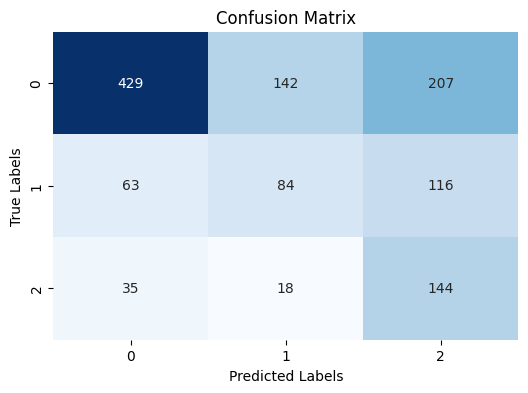


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 429/778 (55.14%)
Class 1: Correct Predictions / Total True Samples = 84/263 (31.94%)
Class 2: Correct Predictions / Total True Samples = 144/197 (73.10%)

Precision-Recall Curves:


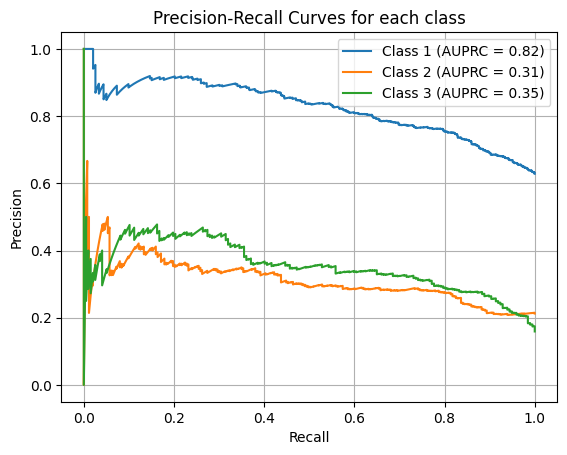


ROC Curves:


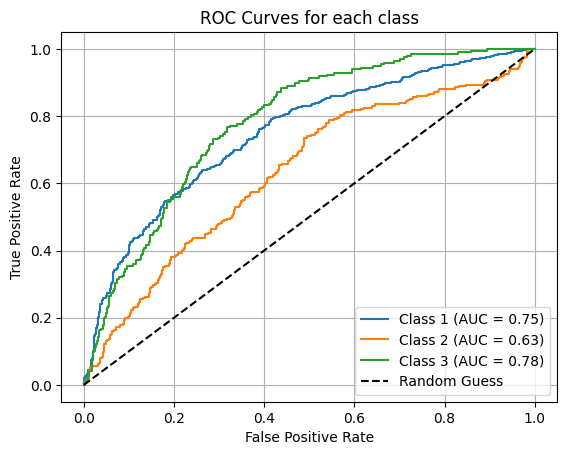


Mean F1 Score: 0.4742
Balanced Accuracy: 0.5339
Average AUPRC: 0.4947

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.55      0.66       778
           1       0.34      0.32      0.33       263
           2       0.31      0.73      0.43       197

    accuracy                           0.53      1238
   macro avg       0.49      0.53      0.47      1238
weighted avg       0.63      0.53      0.55      1238

Fold No: 2
Epoch [1/100], Loss: 1.2164, Accuracy: 0.3550
Validation Loss: 1.2237, Validation Accuracy: 0.3415
Epoch [2/100], Loss: 1.1272, Accuracy: 0.3464
Validation Loss: 1.0087, Validation Accuracy: 0.3353
Epoch [3/100], Loss: 1.1141, Accuracy: 0.3620
Validation Loss: 1.0441, Validation Accuracy: 0.3918
Epoch [4/100], Loss: 1.0725, Accuracy: 0.4410
Validation Loss: 1.1200, Validation Accuracy: 0.3987
Epoch [5/100], Loss: 1.0519, Accuracy: 0.4705
Validation Loss: 1.0594, Validation Accuracy: 0.5095
Epoch [6/100], Los

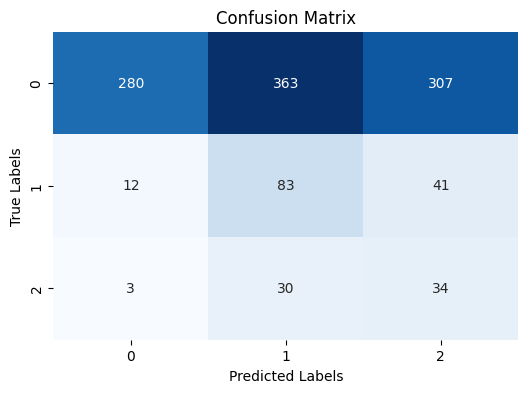


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 280/950 (29.47%)
Class 1: Correct Predictions / Total True Samples = 83/136 (61.03%)
Class 2: Correct Predictions / Total True Samples = 34/67 (50.75%)

Precision-Recall Curves:


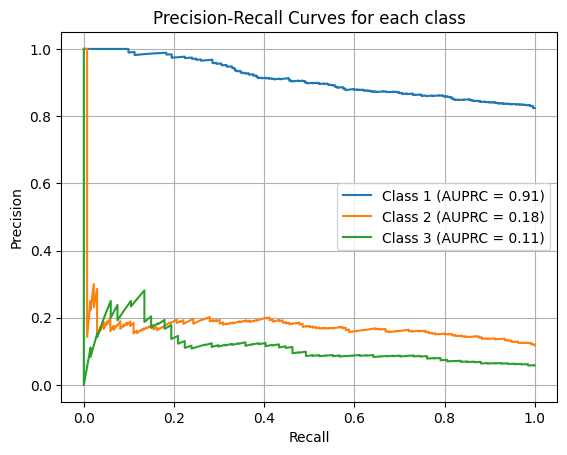


ROC Curves:


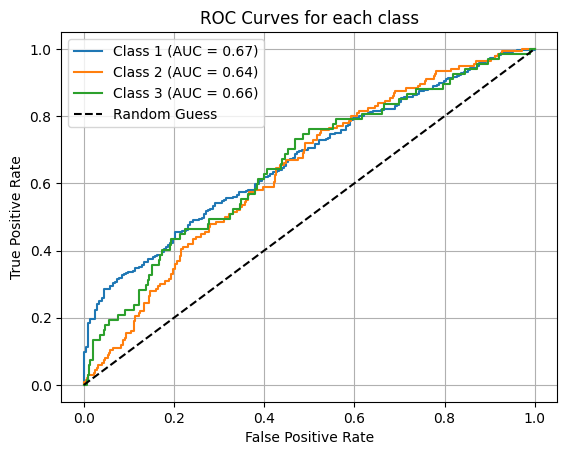


Mean F1 Score: 0.2908
Balanced Accuracy: 0.4708
Average AUPRC: 0.3991

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.29      0.45       950
           1       0.17      0.61      0.27       136
           2       0.09      0.51      0.15        67

    accuracy                           0.34      1153
   macro avg       0.40      0.47      0.29      1153
weighted avg       0.81      0.34      0.41      1153

Fold No: 3
Epoch [1/100], Loss: 1.2282, Accuracy: 0.3437
Validation Loss: 1.3889, Validation Accuracy: 0.3669
Epoch [2/100], Loss: 1.1127, Accuracy: 0.3709
Validation Loss: 1.0042, Validation Accuracy: 0.3785
Epoch [3/100], Loss: 1.0938, Accuracy: 0.4108
Validation Loss: 0.9207, Validation Accuracy: 0.3789
Epoch [4/100], Loss: 1.0742, Accuracy: 0.4550
Validation Loss: 1.0473, Validation Accuracy: 0.4348
Epoch [5/100], Loss: 1.0226, Accuracy: 0.5214
Validation Loss: 1.0191, Validation Accuracy: 0.4203
Epoch [6/100], Los

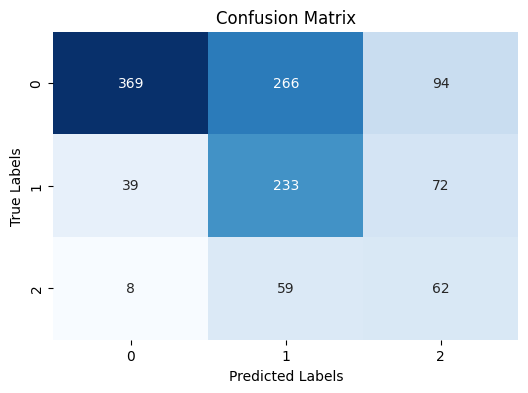


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 369/729 (50.62%)
Class 1: Correct Predictions / Total True Samples = 233/344 (67.73%)
Class 2: Correct Predictions / Total True Samples = 62/129 (48.06%)

Precision-Recall Curves:


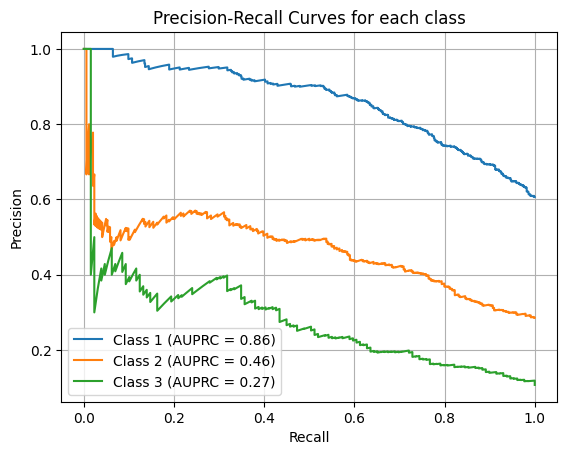


ROC Curves:


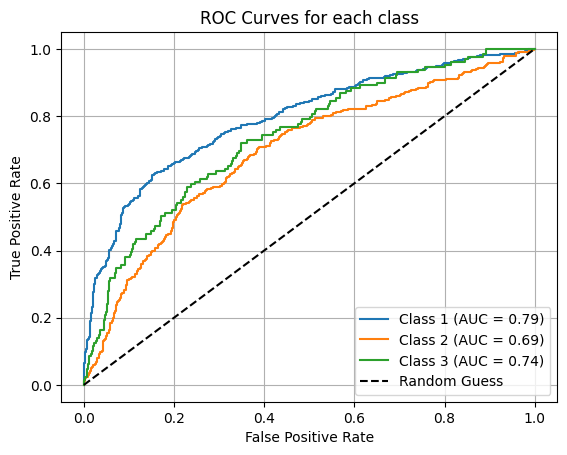


Mean F1 Score: 0.5028
Balanced Accuracy: 0.5547
Average AUPRC: 0.5334

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.51      0.64       729
           1       0.42      0.68      0.52       344
           2       0.27      0.48      0.35       129

    accuracy                           0.55      1202
   macro avg       0.53      0.55      0.50      1202
weighted avg       0.69      0.55      0.58      1202

Fold No: 4
Epoch [1/100], Loss: 1.2396, Accuracy: 0.3494
Validation Loss: 1.0052, Validation Accuracy: 0.3325
Epoch [2/100], Loss: 1.1175, Accuracy: 0.3663
Validation Loss: 1.0163, Validation Accuracy: 0.4029
Epoch [3/100], Loss: 1.0925, Accuracy: 0.3807
Validation Loss: 1.0937, Validation Accuracy: 0.3748
Epoch [4/100], Loss: 1.0703, Accuracy: 0.4526
Validation Loss: 0.9630, Validation Accuracy: 0.5176
Epoch [5/100], Loss: 1.0589, Accuracy: 0.4695
Validation Loss: 1.0149, Validation Accuracy: 0.4992
Epoch [6/100], Los

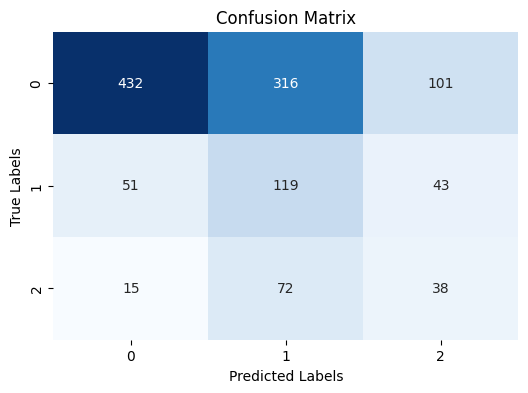


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 432/849 (50.88%)
Class 1: Correct Predictions / Total True Samples = 119/213 (55.87%)
Class 2: Correct Predictions / Total True Samples = 38/125 (30.40%)

Precision-Recall Curves:


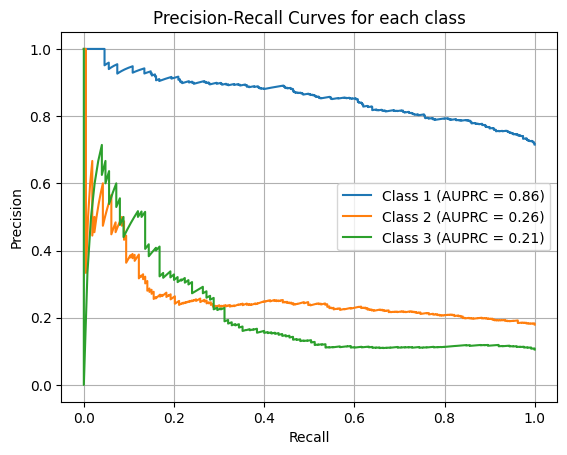


ROC Curves:


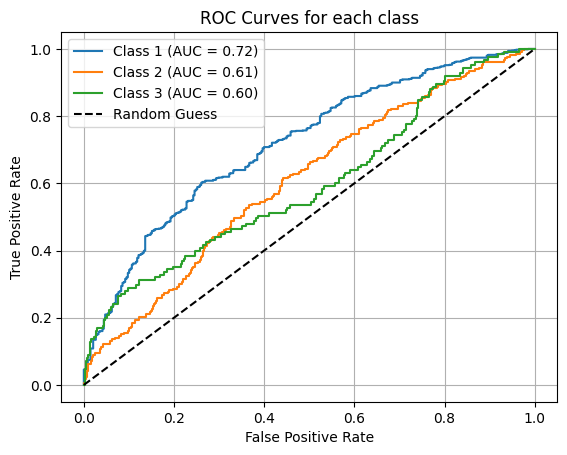


Mean F1 Score: 0.4065
Balanced Accuracy: 0.4572
Average AUPRC: 0.4435

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.51      0.64       849
           1       0.23      0.56      0.33       213
           2       0.21      0.30      0.25       125

    accuracy                           0.50      1187
   macro avg       0.44      0.46      0.41      1187
weighted avg       0.68      0.50      0.54      1187

Fold No: 5
Epoch [1/100], Loss: 1.2684, Accuracy: 0.3545
Validation Loss: 1.0708, Validation Accuracy: 0.2908
Epoch [2/100], Loss: 1.1405, Accuracy: 0.3537
Validation Loss: 0.9849, Validation Accuracy: 0.3325
Epoch [3/100], Loss: 1.1021, Accuracy: 0.3622
Validation Loss: 0.9902, Validation Accuracy: 0.3257
Epoch [4/100], Loss: 1.0877, Accuracy: 0.4054
Validation Loss: 0.9668, Validation Accuracy: 0.3471
Epoch [5/100], Loss: 1.0636, Accuracy: 0.4572
Validation Loss: 1.1933, Validation Accuracy: 0.3808
Epoch [6/100], Los

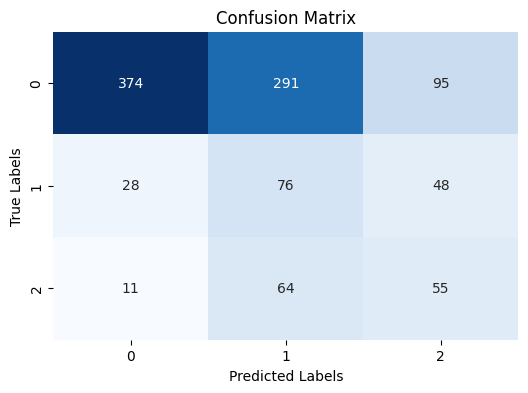


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 374/760 (49.21%)
Class 1: Correct Predictions / Total True Samples = 76/152 (50.00%)
Class 2: Correct Predictions / Total True Samples = 55/130 (42.31%)

Precision-Recall Curves:


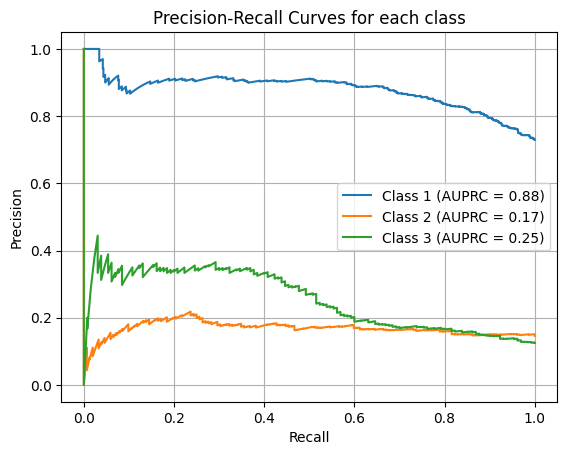


ROC Curves:


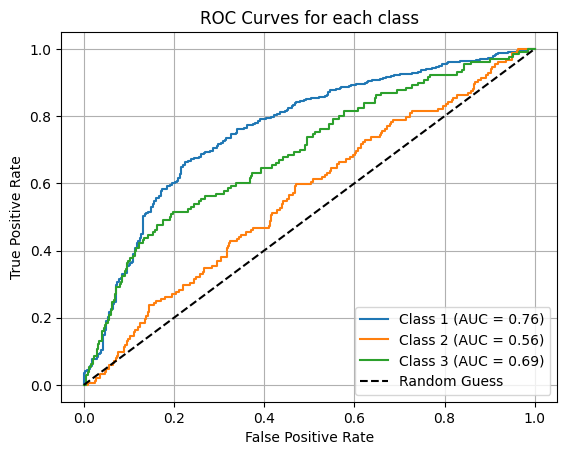


Mean F1 Score: 0.4113
Balanced Accuracy: 0.4717
Average AUPRC: 0.4325

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.49      0.64       760
           1       0.18      0.50      0.26       152
           2       0.28      0.42      0.34       130

    accuracy                           0.48      1042
   macro avg       0.45      0.47      0.41      1042
weighted avg       0.72      0.48      0.54      1042


RESULTS FOR PARAMETER SET 1
Balanced Accuracy for each fold: ['0.5339', '0.4708', '0.5547', '0.4572', '0.4717']
Average Balanced Accuracy across all folds: 0.4977
AUPRC for each fold: ['0.4947', '0.3991', '0.5334', '0.4435', '0.4325']
Average AUPRC across all folds: 0.4606
Best fold (Fold 3) class-wise accuracy: ['0.5062', '0.6773', '0.4806']

PARAMETER SET 2/5
Fold No: 1
Epoch [1/100], Loss: 1.3138, Accuracy: 0.3319
Validation Loss: 1.2369, Validation Accuracy: 0.4114
Epoch [2/100], Loss: 1.1202, Accuracy: 0.3648
Val

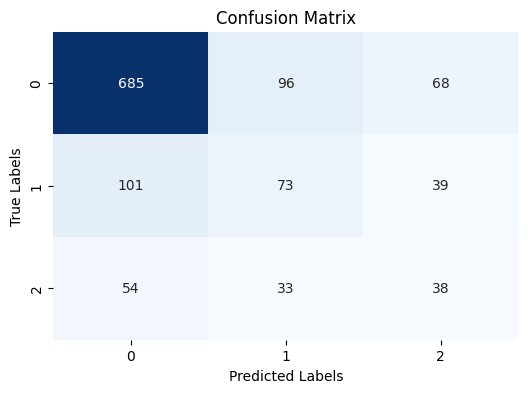


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 685/849 (80.68%)
Class 1: Correct Predictions / Total True Samples = 73/213 (34.27%)
Class 2: Correct Predictions / Total True Samples = 38/125 (30.40%)

Precision-Recall Curves:


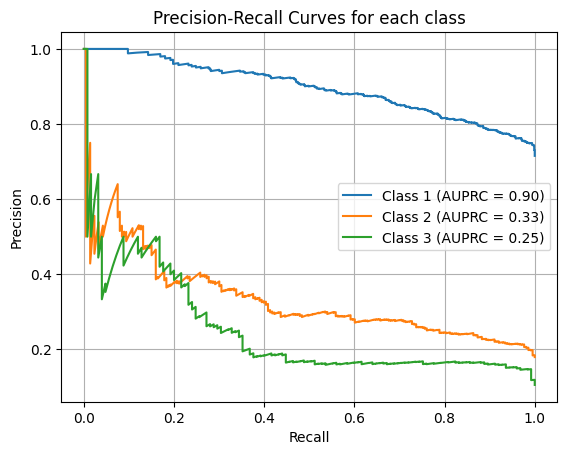


ROC Curves:


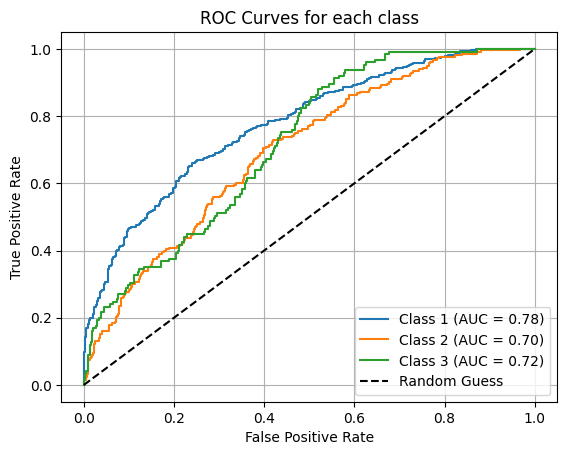


Mean F1 Score: 0.4815
Balanced Accuracy: 0.4845
Average AUPRC: 0.4924

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       849
           1       0.36      0.34      0.35       213
           2       0.26      0.30      0.28       125

    accuracy                           0.67      1187
   macro avg       0.48      0.48      0.48      1187
weighted avg       0.68      0.67      0.67      1187

Fold No: 2
Epoch [1/100], Loss: 1.3214, Accuracy: 0.3538
Validation Loss: 1.4719, Validation Accuracy: 0.3443
Epoch [2/100], Loss: 1.1178, Accuracy: 0.3896
Validation Loss: 1.1883, Validation Accuracy: 0.3111
Epoch [3/100], Loss: 1.0925, Accuracy: 0.3834
Validation Loss: 1.1752, Validation Accuracy: 0.3135
Epoch [4/100], Loss: 1.0647, Accuracy: 0.4121
Validation Loss: 1.0663, Validation Accuracy: 0.3916
Epoch [5/100], Loss: 1.0222, Accuracy: 0.4806
Validation Loss: 1.5240, Validation Accuracy: 0.3804
Epoch [6/100], Los

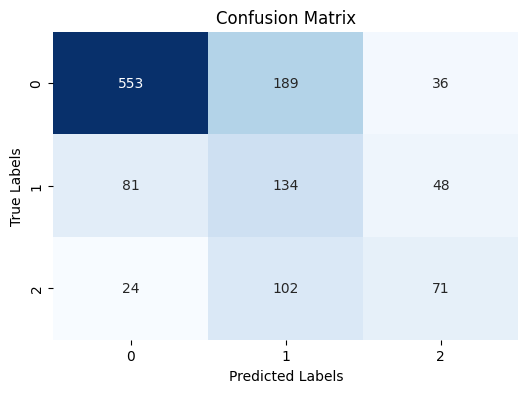


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 553/778 (71.08%)
Class 1: Correct Predictions / Total True Samples = 134/263 (50.95%)
Class 2: Correct Predictions / Total True Samples = 71/197 (36.04%)

Precision-Recall Curves:


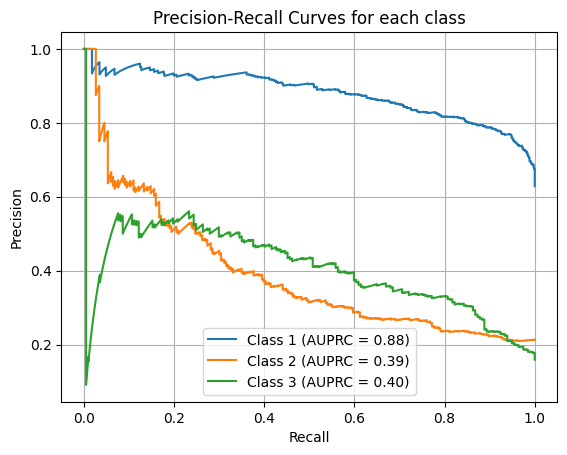


ROC Curves:


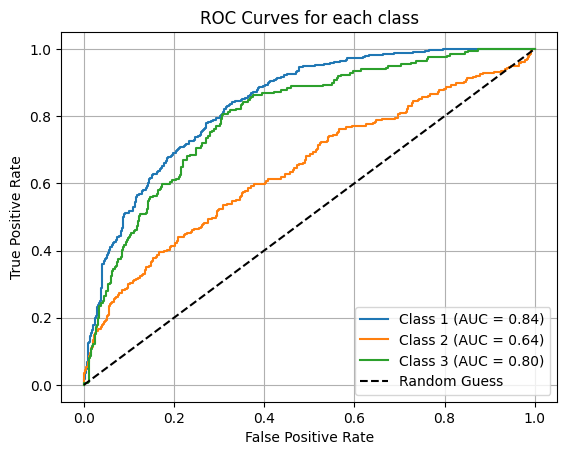


Mean F1 Score: 0.5210
Balanced Accuracy: 0.5269
Average AUPRC: 0.5576

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       778
           1       0.32      0.51      0.39       263
           2       0.46      0.36      0.40       197

    accuracy                           0.61      1238
   macro avg       0.54      0.53      0.52      1238
weighted avg       0.67      0.61      0.63      1238

Fold No: 3
Epoch [1/100], Loss: 1.3821, Accuracy: 0.3188
Validation Loss: 0.9665, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1342, Accuracy: 0.3385
Validation Loss: 1.0230, Validation Accuracy: 0.3192
Epoch [3/100], Loss: 1.1479, Accuracy: 0.3416
Validation Loss: 0.9785, Validation Accuracy: 0.3333
Epoch [4/100], Loss: 1.1357, Accuracy: 0.3437
Validation Loss: 0.9829, Validation Accuracy: 0.3333
Epoch [5/100], Loss: 1.1256, Accuracy: 0.3780
Validation Loss: 1.0992, Validation Accuracy: 0.4150
Epoch [6/100], Los

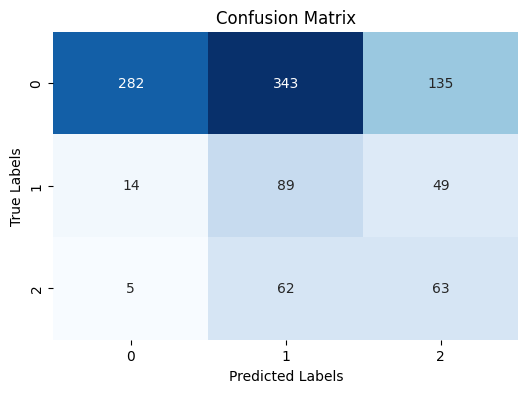


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 282/760 (37.11%)
Class 1: Correct Predictions / Total True Samples = 89/152 (58.55%)
Class 2: Correct Predictions / Total True Samples = 63/130 (48.46%)

Precision-Recall Curves:


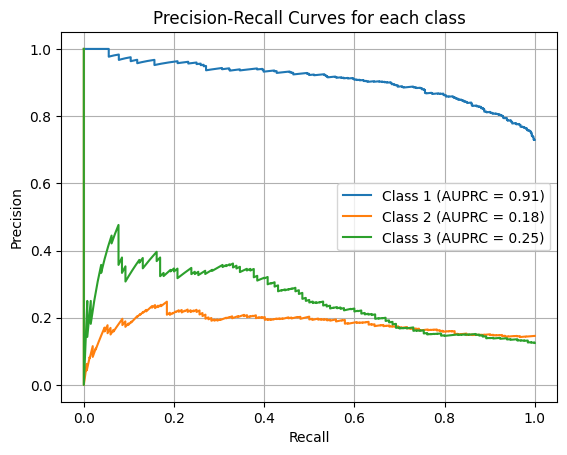


ROC Curves:


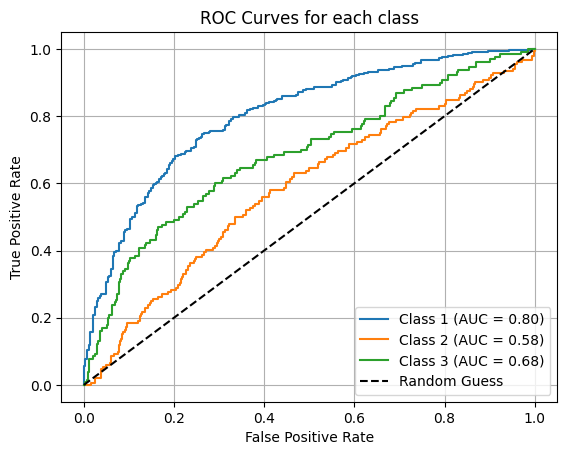


Mean F1 Score: 0.3804
Balanced Accuracy: 0.4804
Average AUPRC: 0.4472

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.37      0.53       760
           1       0.18      0.59      0.28       152
           2       0.26      0.48      0.33       130

    accuracy                           0.42      1042
   macro avg       0.46      0.48      0.38      1042
weighted avg       0.74      0.42      0.47      1042

Fold No: 4
Epoch [1/100], Loss: 1.4092, Accuracy: 0.3093
Validation Loss: 1.2101, Validation Accuracy: 0.3368
Epoch [2/100], Loss: 1.1630, Accuracy: 0.3342
Validation Loss: 1.3951, Validation Accuracy: 0.3333
Epoch [3/100], Loss: 1.1106, Accuracy: 0.3813
Validation Loss: 1.0721, Validation Accuracy: 0.4187
Epoch [4/100], Loss: 1.0540, Accuracy: 0.4379
Validation Loss: 1.0496, Validation Accuracy: 0.3858
Epoch [5/100], Loss: 1.0544, Accuracy: 0.4447
Validation Loss: 1.0662, Validation Accuracy: 0.3798
Epoch [6/100], Los

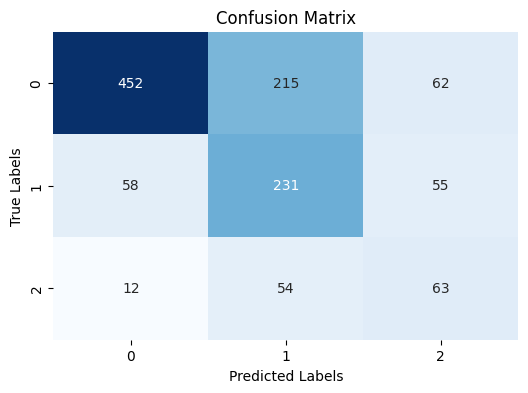


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 452/729 (62.00%)
Class 1: Correct Predictions / Total True Samples = 231/344 (67.15%)
Class 2: Correct Predictions / Total True Samples = 63/129 (48.84%)

Precision-Recall Curves:


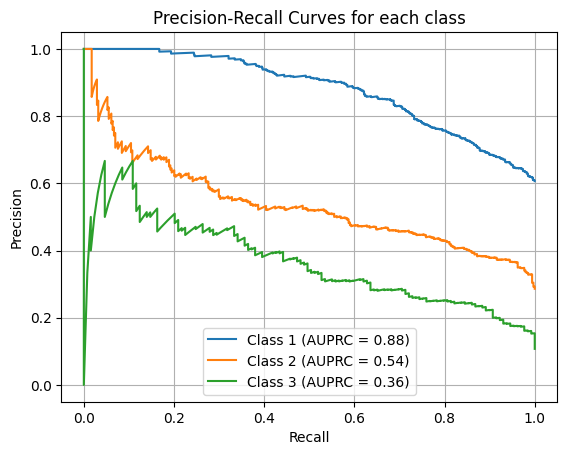


ROC Curves:


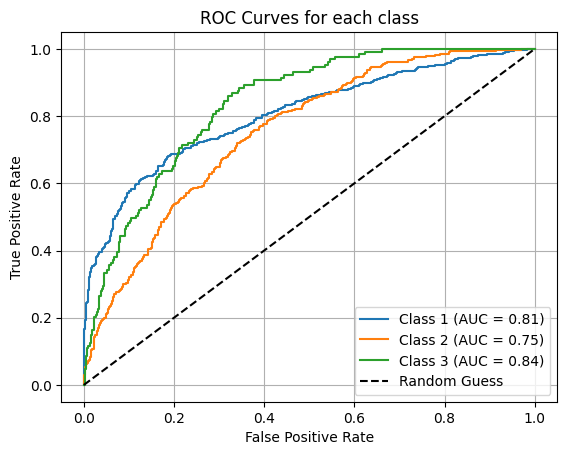


Mean F1 Score: 0.5593
Balanced Accuracy: 0.5933
Average AUPRC: 0.5921

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.62      0.72       729
           1       0.46      0.67      0.55       344
           2       0.35      0.49      0.41       129

    accuracy                           0.62      1202
   macro avg       0.56      0.59      0.56      1202
weighted avg       0.69      0.62      0.64      1202

Fold No: 5
Epoch [1/100], Loss: 1.3096, Accuracy: 0.3444
Validation Loss: 1.1077, Validation Accuracy: 0.4623
Epoch [2/100], Loss: 1.1370, Accuracy: 0.3451
Validation Loss: 1.1085, Validation Accuracy: 0.4575
Epoch [3/100], Loss: 1.1249, Accuracy: 0.3488
Validation Loss: 1.3389, Validation Accuracy: 0.3486
Epoch [4/100], Loss: 1.0567, Accuracy: 0.4226
Validation Loss: 0.9455, Validation Accuracy: 0.4634
Epoch [5/100], Loss: 1.0530, Accuracy: 0.4476
Validation Loss: 1.1855, Validation Accuracy: 0.4684
Epoch [6/100], Los

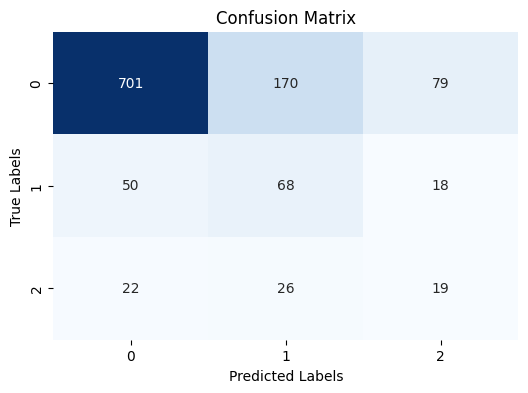


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 701/950 (73.79%)
Class 1: Correct Predictions / Total True Samples = 68/136 (50.00%)
Class 2: Correct Predictions / Total True Samples = 19/67 (28.36%)

Precision-Recall Curves:


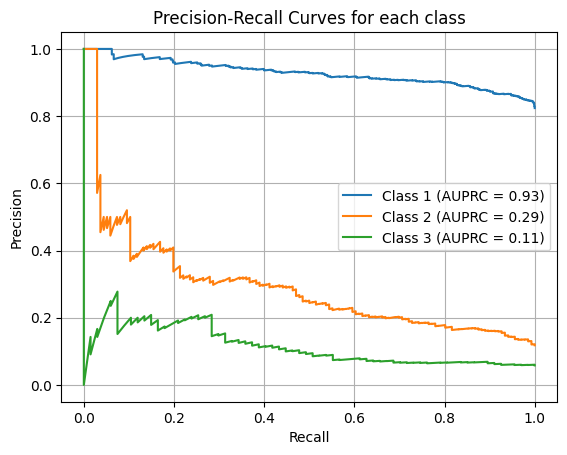


ROC Curves:


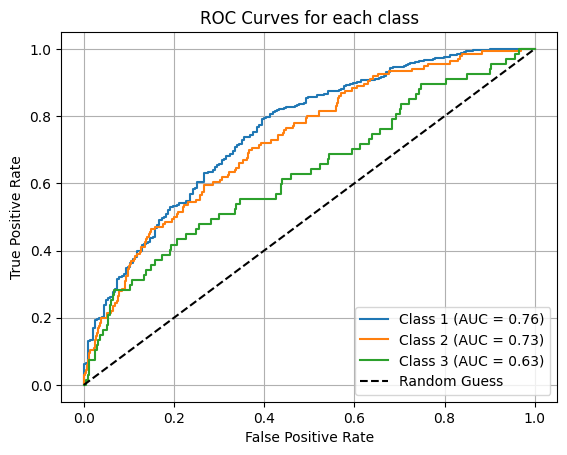


Mean F1 Score: 0.4538
Balanced Accuracy: 0.5072
Average AUPRC: 0.4434

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.74      0.81       950
           1       0.26      0.50      0.34       136
           2       0.16      0.28      0.21        67

    accuracy                           0.68      1153
   macro avg       0.44      0.51      0.45      1153
weighted avg       0.79      0.68      0.72      1153


RESULTS FOR PARAMETER SET 2
Balanced Accuracy for each fold: ['0.4845', '0.5269', '0.4804', '0.5933', '0.5072']
Average Balanced Accuracy across all folds: 0.5185
AUPRC for each fold: ['0.4924', '0.5576', '0.4472', '0.5921', '0.4434']
Average AUPRC across all folds: 0.5065
Best fold (Fold 4) class-wise accuracy: ['0.6200', '0.6715', '0.4884']

PARAMETER SET 3/5
Fold No: 1
Epoch [1/100], Loss: 1.3051, Accuracy: 0.3188
Validation Loss: 1.1072, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1171, Accuracy: 0.3686
Val

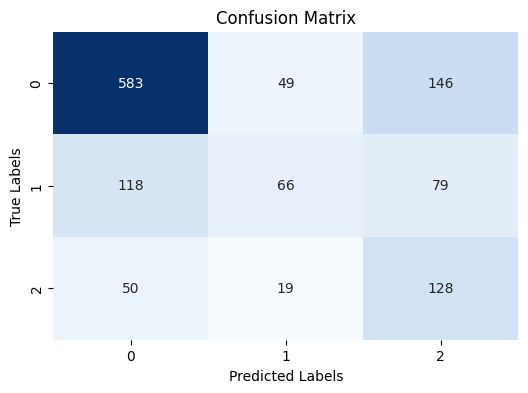


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 583/778 (74.94%)
Class 1: Correct Predictions / Total True Samples = 66/263 (25.10%)
Class 2: Correct Predictions / Total True Samples = 128/197 (64.97%)

Precision-Recall Curves:


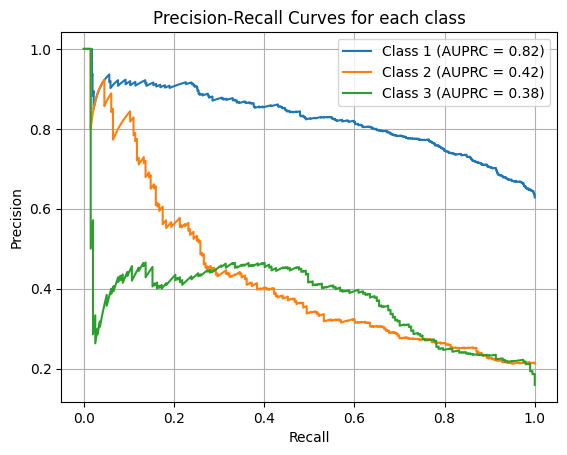


ROC Curves:


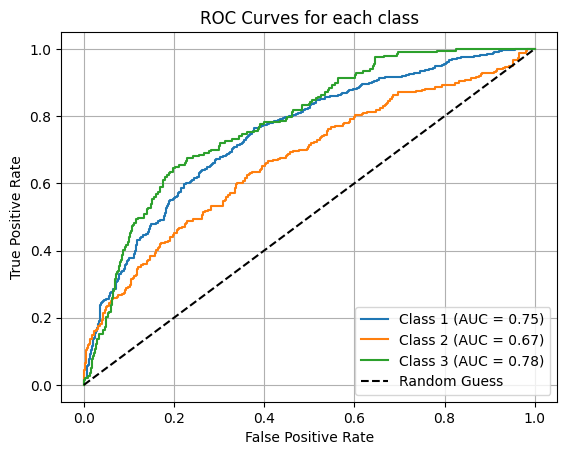


Mean F1 Score: 0.5202
Balanced Accuracy: 0.5500
Average AUPRC: 0.5404

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.76       778
           1       0.49      0.25      0.33       263
           2       0.36      0.65      0.47       197

    accuracy                           0.63      1238
   macro avg       0.54      0.55      0.52      1238
weighted avg       0.65      0.63      0.62      1238

Fold No: 2
Epoch [1/100], Loss: 1.2609, Accuracy: 0.3599
Validation Loss: 0.9821, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1230, Accuracy: 0.3855
Validation Loss: 1.0674, Validation Accuracy: 0.3225
Epoch [3/100], Loss: 1.1013, Accuracy: 0.4121
Validation Loss: 1.0759, Validation Accuracy: 0.4079
Epoch [4/100], Loss: 1.0662, Accuracy: 0.4530
Validation Loss: 0.9439, Validation Accuracy: 0.3702
Epoch [5/100], Loss: 1.0625, Accuracy: 0.4407
Validation Loss: 1.0356, Validation Accuracy: 0.4521
Epoch [6/100], Los

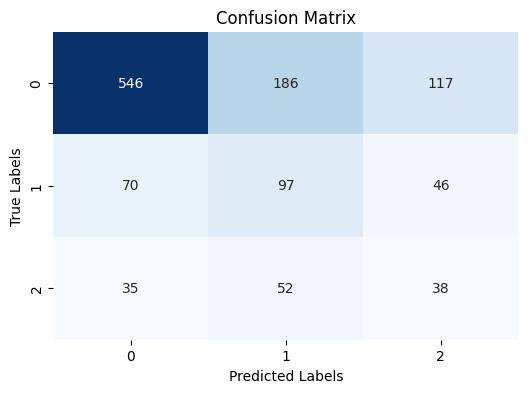


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 546/849 (64.31%)
Class 1: Correct Predictions / Total True Samples = 97/213 (45.54%)
Class 2: Correct Predictions / Total True Samples = 38/125 (30.40%)

Precision-Recall Curves:


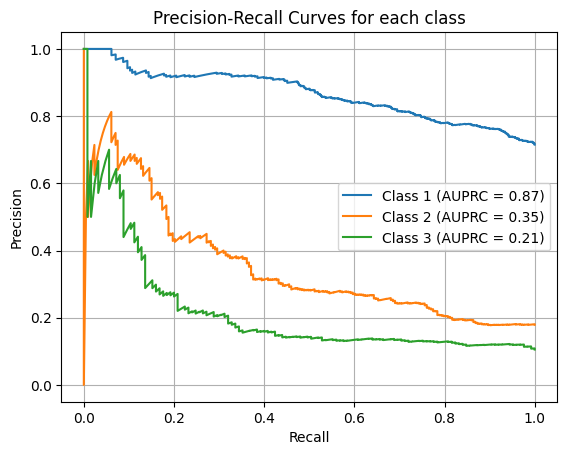


ROC Curves:


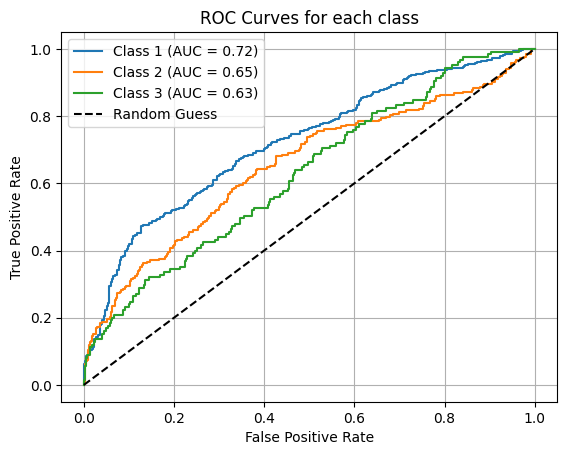


Mean F1 Score: 0.4384
Balanced Accuracy: 0.4675
Average AUPRC: 0.4763

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.64      0.73       849
           1       0.29      0.46      0.35       213
           2       0.19      0.30      0.23       125

    accuracy                           0.57      1187
   macro avg       0.44      0.47      0.44      1187
weighted avg       0.67      0.57      0.61      1187

Fold No: 3
Epoch [1/100], Loss: 1.3111, Accuracy: 0.3173
Validation Loss: 1.1065, Validation Accuracy: 0.3097
Epoch [2/100], Loss: 1.1155, Accuracy: 0.3587
Validation Loss: 1.0824, Validation Accuracy: 0.3140
Epoch [3/100], Loss: 1.1066, Accuracy: 0.3858
Validation Loss: 1.0875, Validation Accuracy: 0.2912
Epoch [4/100], Loss: 1.1172, Accuracy: 0.3638
Validation Loss: 1.2232, Validation Accuracy: 0.2880
Epoch [5/100], Loss: 1.1070, Accuracy: 0.3951
Validation Loss: 1.1172, Validation Accuracy: 0.3653
Epoch [6/100], Los

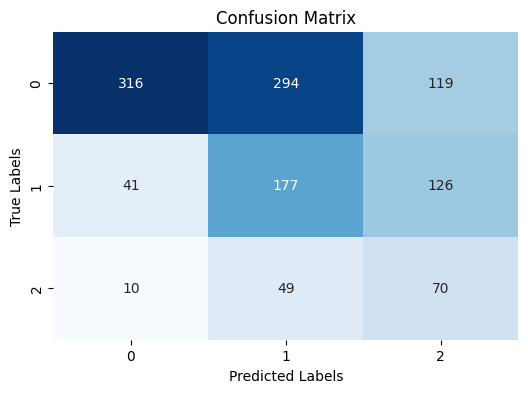


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 316/729 (43.35%)
Class 1: Correct Predictions / Total True Samples = 177/344 (51.45%)
Class 2: Correct Predictions / Total True Samples = 70/129 (54.26%)

Precision-Recall Curves:


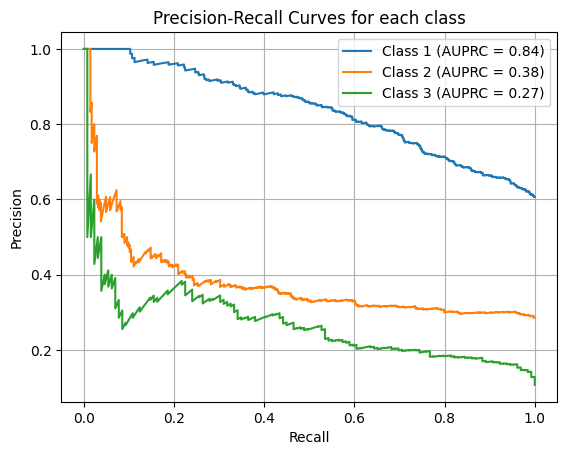


ROC Curves:


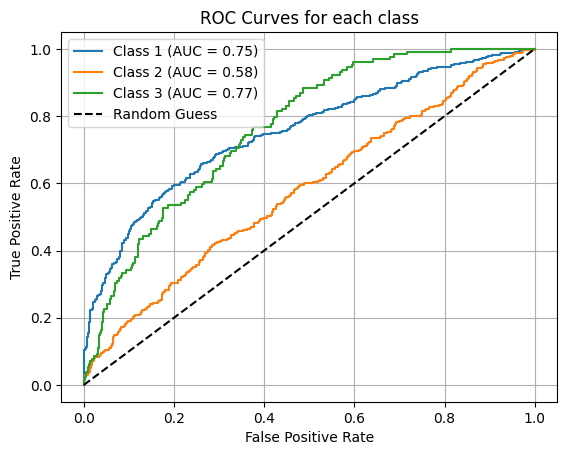


Mean F1 Score: 0.4339
Balanced Accuracy: 0.4969
Average AUPRC: 0.4933

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.43      0.58       729
           1       0.34      0.51      0.41       344
           2       0.22      0.54      0.32       129

    accuracy                           0.47      1202
   macro avg       0.47      0.50      0.43      1202
weighted avg       0.64      0.47      0.50      1202

Fold No: 4
Epoch [1/100], Loss: 1.2304, Accuracy: 0.3230
Validation Loss: 1.0084, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1275, Accuracy: 0.3709
Validation Loss: 1.0632, Validation Accuracy: 0.3333
Epoch [3/100], Loss: 1.1099, Accuracy: 0.3732
Validation Loss: 1.2060, Validation Accuracy: 0.3451
Epoch [4/100], Loss: 1.0866, Accuracy: 0.4196
Validation Loss: 0.9931, Validation Accuracy: 0.4935
Epoch [5/100], Loss: 1.0423, Accuracy: 0.4712
Validation Loss: 1.0571, Validation Accuracy: 0.4891
Epoch [6/100], Los

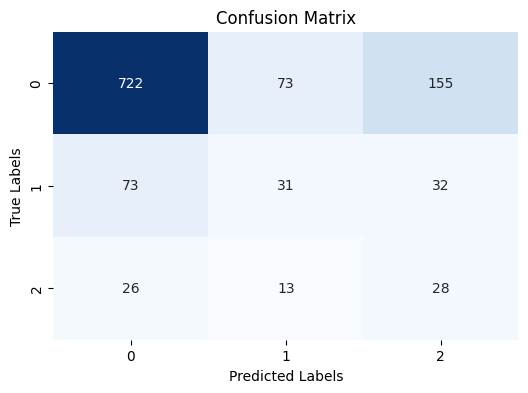


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 722/950 (76.00%)
Class 1: Correct Predictions / Total True Samples = 31/136 (22.79%)
Class 2: Correct Predictions / Total True Samples = 28/67 (41.79%)

Precision-Recall Curves:


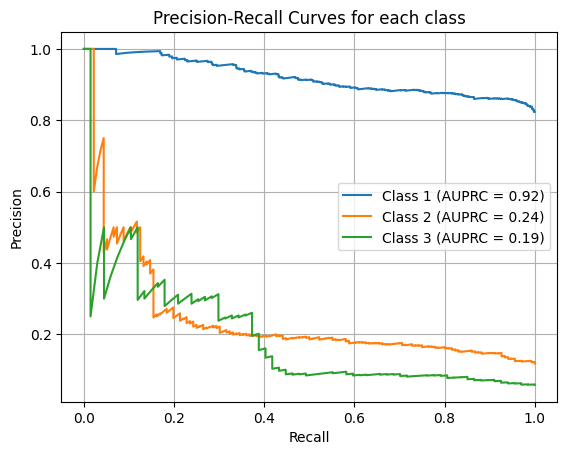


ROC Curves:


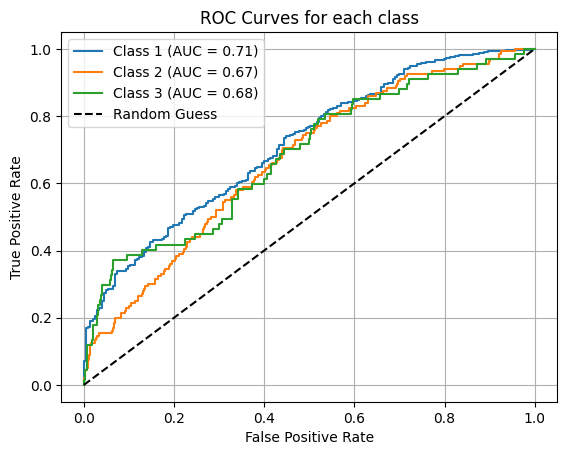


Mean F1 Score: 0.4197
Balanced Accuracy: 0.4686
Average AUPRC: 0.4503

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.76      0.82       950
           1       0.26      0.23      0.25       136
           2       0.13      0.42      0.20        67

    accuracy                           0.68      1153
   macro avg       0.42      0.47      0.42      1153
weighted avg       0.76      0.68      0.71      1153

Fold No: 5
Epoch [1/100], Loss: 1.1934, Accuracy: 0.3267
Validation Loss: 1.1118, Validation Accuracy: 0.3637
Epoch [2/100], Loss: 1.1195, Accuracy: 0.3917
Validation Loss: 1.1074, Validation Accuracy: 0.4524
Epoch [3/100], Loss: 1.0472, Accuracy: 0.4435
Validation Loss: 1.3652, Validation Accuracy: 0.3826
Epoch [4/100], Loss: 1.0379, Accuracy: 0.4930
Validation Loss: 1.4476, Validation Accuracy: 0.3790
Epoch [5/100], Loss: 1.0120, Accuracy: 0.5055
Validation Loss: 1.1925, Validation Accuracy: 0.4051
Epoch [6/100], Los

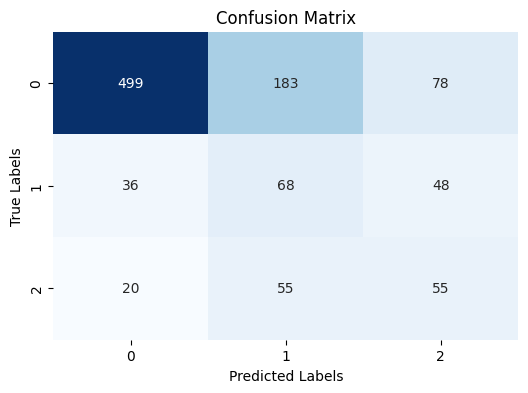


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 499/760 (65.66%)
Class 1: Correct Predictions / Total True Samples = 68/152 (44.74%)
Class 2: Correct Predictions / Total True Samples = 55/130 (42.31%)

Precision-Recall Curves:


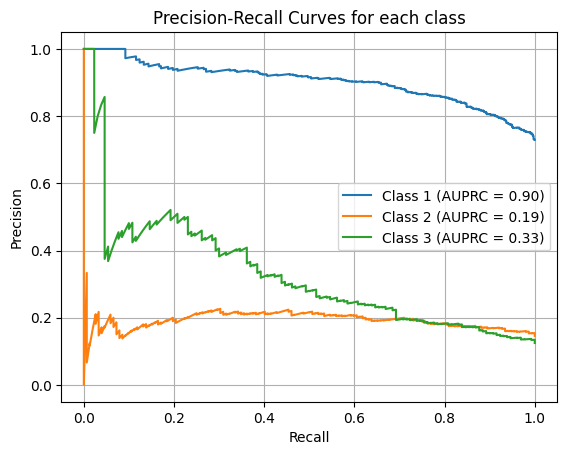


ROC Curves:


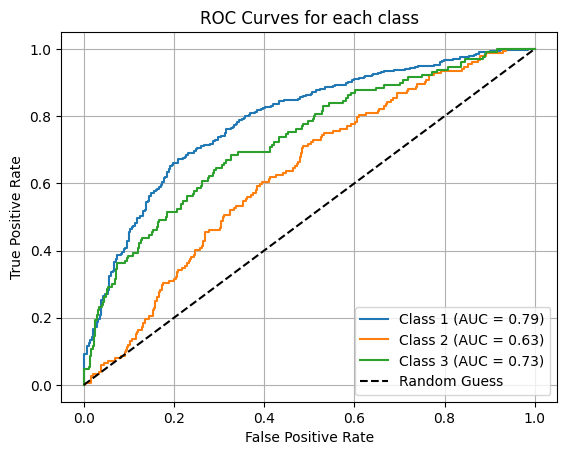


Mean F1 Score: 0.4699
Balanced Accuracy: 0.5090
Average AUPRC: 0.4732

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.66      0.76       760
           1       0.22      0.45      0.30       152
           2       0.30      0.42      0.35       130

    accuracy                           0.60      1042
   macro avg       0.48      0.51      0.47      1042
weighted avg       0.73      0.60      0.64      1042


RESULTS FOR PARAMETER SET 3
Balanced Accuracy for each fold: ['0.5500', '0.4675', '0.4969', '0.4686', '0.5090']
Average Balanced Accuracy across all folds: 0.4984
AUPRC for each fold: ['0.5404', '0.4763', '0.4933', '0.4503', '0.4732']
Average AUPRC across all folds: 0.4867
Best fold (Fold 1) class-wise accuracy: ['0.7494', '0.2510', '0.6497']

PARAMETER SET 4/5
Fold No: 1
Epoch [1/100], Loss: 1.1686, Accuracy: 0.3579
Validation Loss: 1.0945, Validation Accuracy: 0.3333
Epoch [2/100], Loss: 1.1204, Accuracy: 0.3621
Val

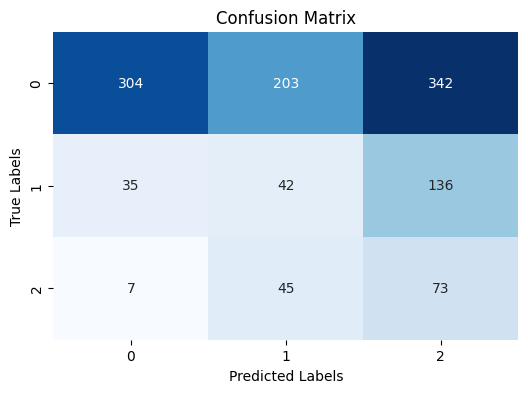


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 304/849 (35.81%)
Class 1: Correct Predictions / Total True Samples = 42/213 (19.72%)
Class 2: Correct Predictions / Total True Samples = 73/125 (58.40%)

Precision-Recall Curves:


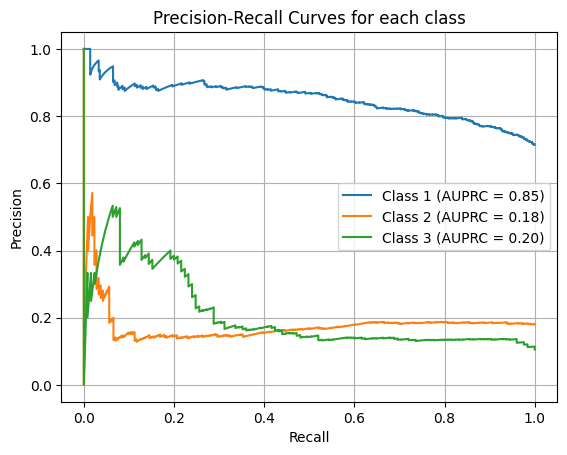


ROC Curves:


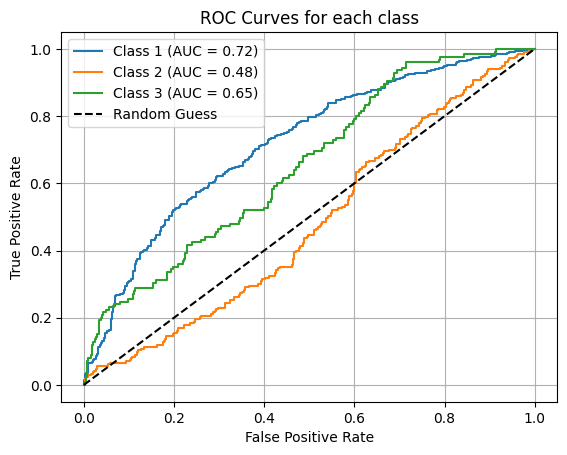


Mean F1 Score: 0.2973
Balanced Accuracy: 0.3798
Average AUPRC: 0.4104

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.36      0.51       849
           1       0.14      0.20      0.17       213
           2       0.13      0.58      0.22       125

    accuracy                           0.35      1187
   macro avg       0.39      0.38      0.30      1187
weighted avg       0.67      0.35      0.42      1187

Fold No: 2
Epoch [1/100], Loss: 1.1658, Accuracy: 0.3367
Validation Loss: 1.1838, Validation Accuracy: 0.2902
Epoch [2/100], Loss: 1.1288, Accuracy: 0.3681
Validation Loss: 1.1157, Validation Accuracy: 0.3183
Epoch [3/100], Loss: 1.1230, Accuracy: 0.3503
Validation Loss: 1.0325, Validation Accuracy: 0.2989
Epoch [4/100], Loss: 1.1245, Accuracy: 0.3537
Validation Loss: 1.3769, Validation Accuracy: 0.3635
Epoch [5/100], Loss: 1.0950, Accuracy: 0.3817
Validation Loss: 1.2266, Validation Accuracy: 0.2833
Epoch [6/100], Los

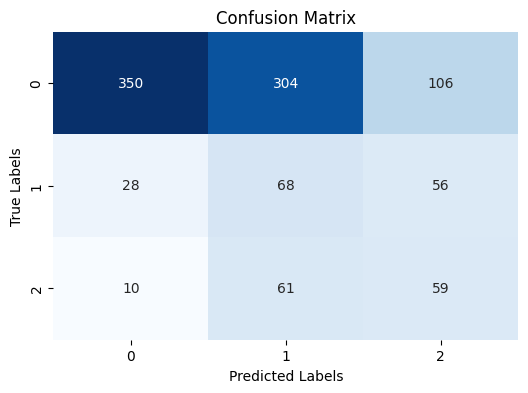


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 350/760 (46.05%)
Class 1: Correct Predictions / Total True Samples = 68/152 (44.74%)
Class 2: Correct Predictions / Total True Samples = 59/130 (45.38%)

Precision-Recall Curves:


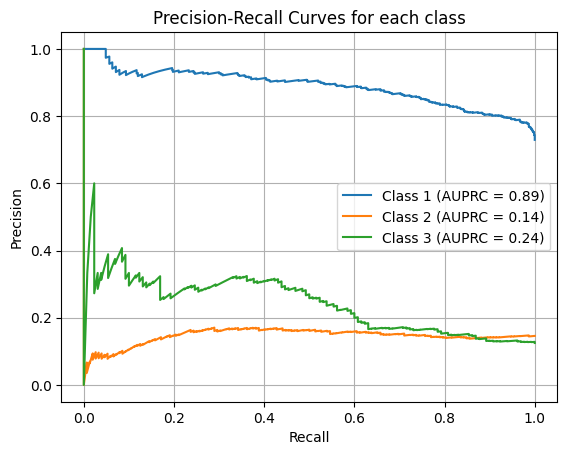


ROC Curves:


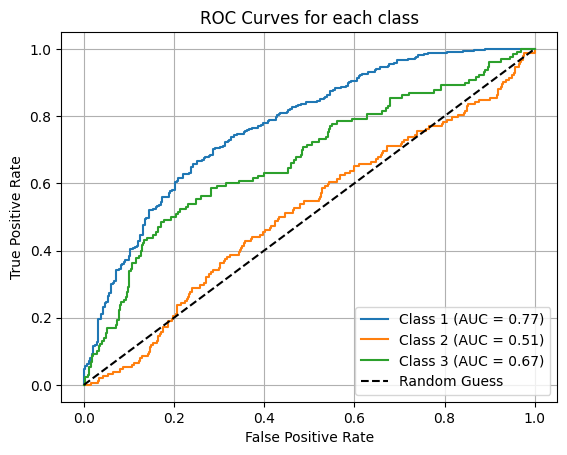


Mean F1 Score: 0.3928
Balanced Accuracy: 0.4539
Average AUPRC: 0.4242

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.46      0.61       760
           1       0.16      0.45      0.23       152
           2       0.27      0.45      0.34       130

    accuracy                           0.46      1042
   macro avg       0.44      0.45      0.39      1042
weighted avg       0.71      0.46      0.52      1042

Fold No: 3
Epoch [1/100], Loss: 1.1916, Accuracy: 0.3489
Validation Loss: 1.3984, Validation Accuracy: 0.3346
Epoch [2/100], Loss: 1.2050, Accuracy: 0.3313
Validation Loss: 1.1962, Validation Accuracy: 0.3417
Epoch [3/100], Loss: 1.1402, Accuracy: 0.3904
Validation Loss: 0.9751, Validation Accuracy: 0.3162
Epoch [4/100], Loss: 1.1054, Accuracy: 0.3759
Validation Loss: 1.1470, Validation Accuracy: 0.3601
Epoch [5/100], Loss: 1.0890, Accuracy: 0.3904
Validation Loss: 1.3541, Validation Accuracy: 0.3526
Epoch [6/100], Los

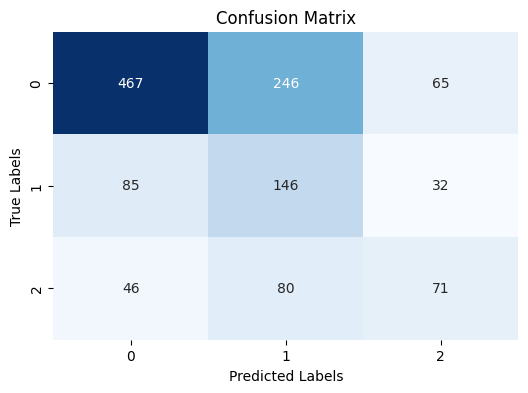


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 467/778 (60.03%)
Class 1: Correct Predictions / Total True Samples = 146/263 (55.51%)
Class 2: Correct Predictions / Total True Samples = 71/197 (36.04%)

Precision-Recall Curves:


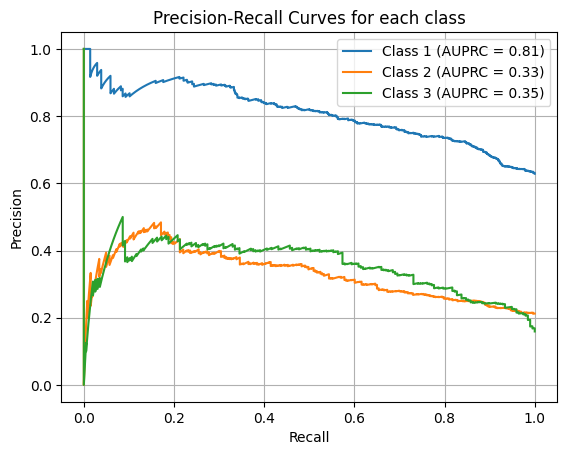


ROC Curves:


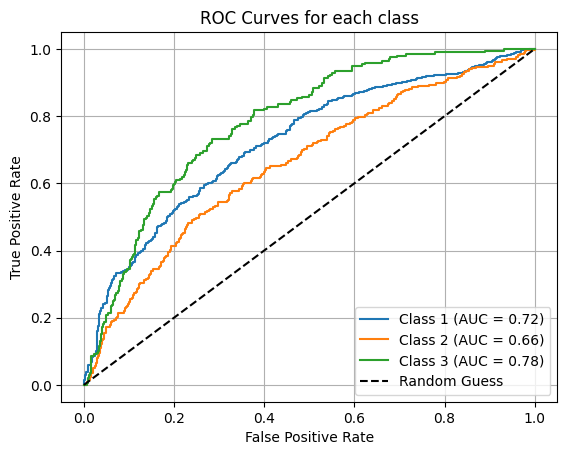


Mean F1 Score: 0.4884
Balanced Accuracy: 0.5053
Average AUPRC: 0.4957

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.60      0.68       778
           1       0.31      0.56      0.40       263
           2       0.42      0.36      0.39       197

    accuracy                           0.55      1238
   macro avg       0.50      0.51      0.49      1238
weighted avg       0.62      0.55      0.57      1238

Fold No: 4
Epoch [1/100], Loss: 1.1789, Accuracy: 0.3628
Validation Loss: 0.9533, Validation Accuracy: 0.3290
Epoch [2/100], Loss: 1.1203, Accuracy: 0.3767
Validation Loss: 0.9850, Validation Accuracy: 0.3347
Epoch [3/100], Loss: 1.1277, Accuracy: 0.3576
Validation Loss: 1.4426, Validation Accuracy: 0.3338
Epoch [4/100], Loss: 1.1204, Accuracy: 0.3689
Validation Loss: 0.9746, Validation Accuracy: 0.3382
Epoch [5/100], Loss: 1.1040, Accuracy: 0.3611
Validation Loss: 1.1280, Validation Accuracy: 0.3397
Epoch [6/100], Los

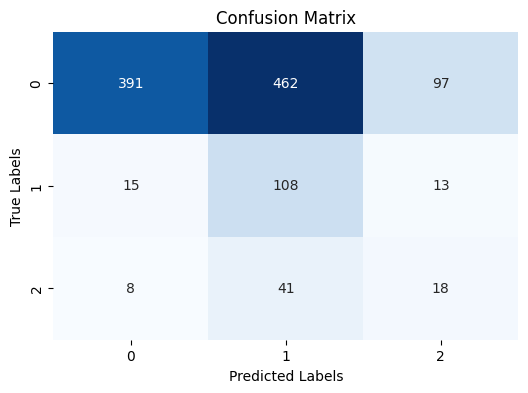


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 391/950 (41.16%)
Class 1: Correct Predictions / Total True Samples = 108/136 (79.41%)
Class 2: Correct Predictions / Total True Samples = 18/67 (26.87%)

Precision-Recall Curves:


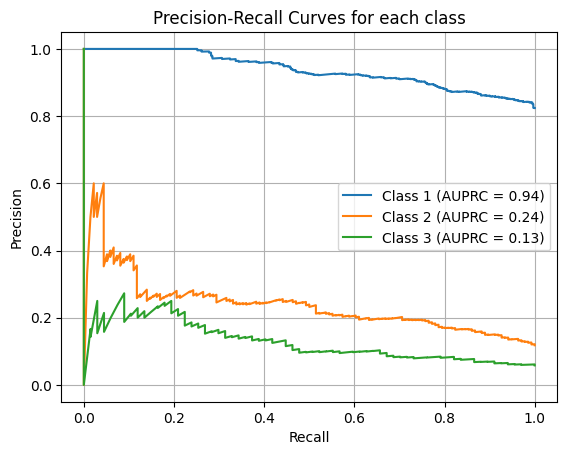


ROC Curves:


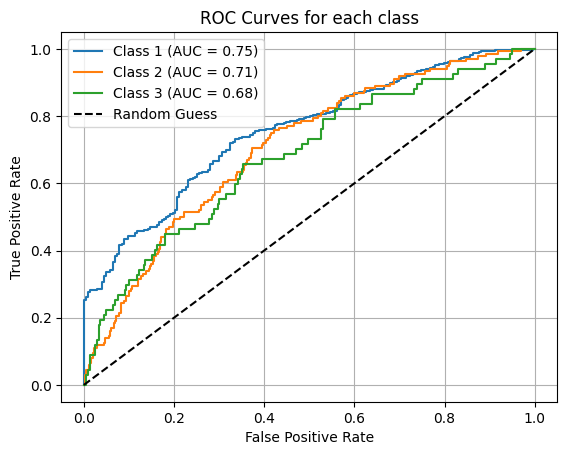


Mean F1 Score: 0.3490
Balanced Accuracy: 0.4915
Average AUPRC: 0.4328

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.41      0.57       950
           1       0.18      0.79      0.29       136
           2       0.14      0.27      0.18        67

    accuracy                           0.45      1153
   macro avg       0.42      0.49      0.35      1153
weighted avg       0.81      0.45      0.52      1153

Fold No: 5
Epoch [1/100], Loss: 1.1597, Accuracy: 0.3510
Validation Loss: 1.4318, Validation Accuracy: 0.3544
Epoch [2/100], Loss: 1.1290, Accuracy: 0.3466
Validation Loss: 1.0123, Validation Accuracy: 0.3159
Epoch [3/100], Loss: 1.1336, Accuracy: 0.3355
Validation Loss: 1.2897, Validation Accuracy: 0.3309
Epoch [4/100], Loss: 1.1058, Accuracy: 0.3658
Validation Loss: 1.1652, Validation Accuracy: 0.3646
Epoch [5/100], Loss: 1.1043, Accuracy: 0.3724
Validation Loss: 0.9763, Validation Accuracy: 0.3966
Epoch [6/100], Los

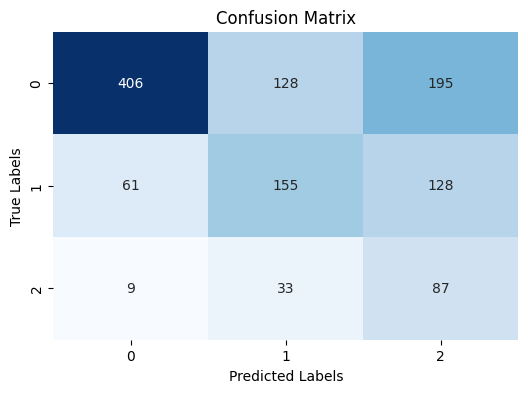


Class-wise Accuracy:
Class 0: Correct Predictions / Total True Samples = 406/729 (55.69%)
Class 1: Correct Predictions / Total True Samples = 155/344 (45.06%)
Class 2: Correct Predictions / Total True Samples = 87/129 (67.44%)

Precision-Recall Curves:


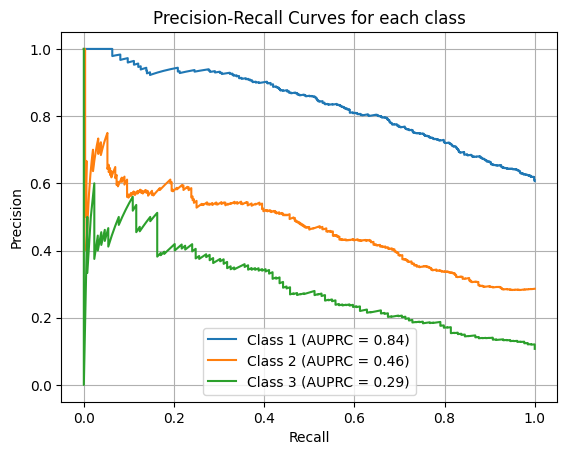


ROC Curves:


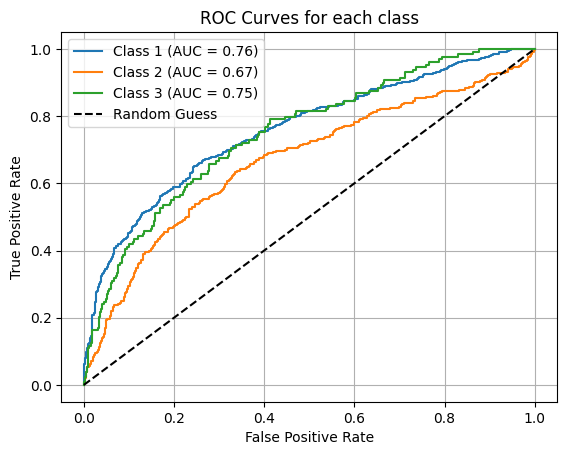


Mean F1 Score: 0.4888
Balanced Accuracy: 0.5606
Average AUPRC: 0.5300

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.56      0.67       729
           1       0.49      0.45      0.47       344
           2       0.21      0.67      0.32       129

    accuracy                           0.54      1202
   macro avg       0.52      0.56      0.49      1202
weighted avg       0.68      0.54      0.58      1202


RESULTS FOR PARAMETER SET 4
Balanced Accuracy for each fold: ['0.3798', '0.4539', '0.5053', '0.4915', '0.5606']
Average Balanced Accuracy across all folds: 0.4782
AUPRC for each fold: ['0.4104', '0.4242', '0.4957', '0.4328', '0.5300']
Average AUPRC across all folds: 0.4586
Best fold (Fold 5) class-wise accuracy: ['0.5569', '0.4506', '0.6744']

SUMMARY OF ALL PARAMETER SETS

Parameter Set 1:
  Mean Balanced Accuracy: 0.4977
  Mean AUPRC: 0.4606
  Best Fold: 3
  Best Fold Class Accuracies: ['0.5062', '0.6773', '0.4806']

In [9]:
import pandas as pd
import os
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, auc


best_hyperparameters = [
    # {'embed_dim': 128, 'depths': [2, 2, 6, 2], 'num_heads': [4, 8, 16, 32], 'window_size': 14, 'mlp_ratio': 2.8859252729165528, 'drop_rate': 0.14376422440199177, 'attn_drop_rate': 0.16147072703456217, 'drop_path_rate': 0.07894141037454817, 'learning_rate': 3.0176840296221454e-05, 'weight_decay': 1.4789889052203777e-06, 'batch_size': 32, 'optimizer': 'Adam', 'label_smoothing': 0.12926376177953994, 'factor': 1}, # trial 68, acc=0.5027
    # {'embed_dim': 128, 'depths': [2, 2, 6, 2], 'num_heads': [4, 8, 16, 32], 'window_size': 14, 'mlp_ratio': 2.8859252729165528, 'drop_rate': 0.14376422440199177, 'attn_drop_rate': 0.16147072703456217, 'drop_path_rate': 0.07894141037454817, 'learning_rate': 3.0176840296221454e-05, 'weight_decay': 1.4789889052203777e-06, 'batch_size': 32, 'optimizer': 'Adam', 'label_smoothing': 0.12926376177953994, 'factor': 1}, # trial 68, acc=0.5027
    {'embed_dim': 128, 'depths': [2, 2, 6, 2], 'num_heads': [4, 8, 16, 32], 'window_size': 14, 'mlp_ratio': 2.5295742393507976, 'drop_rate': 0.17096020199717704, 'attn_drop_rate': 0.16336374502145412, 'drop_path_rate': 0.12060508681590712, 'learning_rate': 3.074589162672984e-05, 'weight_decay': 4.299572554033588e-06, 'batch_size': 32, 'optimizer': 'Adam', 'label_smoothing': 0.16751814781318303, 'factor': 1}, # trial 82, acc=0.4911
    {'embed_dim': 128, 'depths': [2, 2, 6, 2], 'num_heads': [4, 8, 16, 32], 'window_size': 14, 'mlp_ratio': 2.9960128148938, 'drop_rate': 0.1603592149136427, 'attn_drop_rate': 0.27340491846591397, 'drop_path_rate': 0.04458330992445373, 'learning_rate': 4.56009251550066e-05, 'weight_decay': 1.9937908639020903e-05, 'batch_size': 32, 'optimizer': 'Adam', 'label_smoothing': 0.028032832454084618, 'factor': 1}, # trial 88, acc=0.4796
    {'embed_dim': 128, 'depths': [2, 2, 6, 2], 'num_heads': [4, 8, 16, 32], 'window_size': 14, 'mlp_ratio': 2.6916032950372144, 'drop_rate': 0.13991044944893521, 'attn_drop_rate': 0.14406693252941613, 'drop_path_rate': 0.13836347767851692, 'learning_rate': 3.3019565308722566e-05, 'weight_decay': 2.4638182060806145e-06, 'batch_size': 32, 'optimizer': 'Adam', 'label_smoothing': 0.14880632115537173, 'factor': 1}, # trial 91, acc=0.4790
    {'embed_dim': 96, 'depths': [2, 2, 6, 2], 'num_heads': [3, 6, 12, 24], 'window_size': 7, 'mlp_ratio': 2.780919073741688, 'drop_rate': 0.1973260652401285, 'attn_drop_rate': 0.18829742729844418, 'drop_path_rate': 0.399702146494261, 'learning_rate': 2.4464245888134677e-05, 'weight_decay': 1.3417416605016543e-06, 'batch_size': 32, 'optimizer': 'AdamW', 'label_smoothing': 0.040367137652043486, 'factor': 1}, # trial 99, acc=0.4780
]

# Store results for all parameter sets
all_results = []

for parameter in range(len(best_hyperparameters)):
    
    #clear the GPU cache
    torch.cuda.empty_cache()

    print(f"\n{'='*60}")
    print(f"PARAMETER SET {parameter + 1}/5")
    print(f"{'='*60}")

    # Load the best hyperparameters for the current trial
    
    hyperparameters = best_hyperparameters[parameter]
    # Unpack hyperparameters
    config = {
        "embed_dim": hyperparameters["embed_dim"],
        "depths": hyperparameters["depths"],
        "num_heads": hyperparameters["num_heads"],
        "window_size": hyperparameters["window_size"],
        "mlp_ratio": hyperparameters["mlp_ratio"],
        "drop_rate": hyperparameters["drop_rate"],
        "attn_drop_rate": hyperparameters["attn_drop_rate"],
        "drop_path_rate": hyperparameters["drop_path_rate"],
    }
    
    learning_rate = hyperparameters["learning_rate"]
    weight_decay = hyperparameters["weight_decay"]
    batch_size = hyperparameters["batch_size"]
    optimizer = hyperparameters["optimizer"]
    label_smoothing = hyperparameters["label_smoothing"]
    factor = hyperparameters["factor"]

    # Fold indices and other configurations
    num_folds = 5
    fold_indices = np.random.permutation(np.arange(num_folds))
    val_fold_indices = np.roll(fold_indices, 1)

    test_folds_chosen = []
    val_folds_chosen = []
    fold_confusion_matrices = []  # To store confusion matrices for each fold
    fold_accuracies = []  # To store balanced accuracy for each fold
    fold_auprcs = []  # To store AUPRC for each fold
    fold_class_accuracies = []  # To store class-wise accuracies for each fold

    # Model and training configurations
    num_classes = 3
    epochs = 100
    input_shape = (3,224,224)  # (channels, height, width)
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    
    #set random seed for reproducibility
    torch.manual_seed(42)
    debug_mode_flag = False
    np.random.seed(42)
    
    # Training loop for cross-validation
    for fold_idx in range(num_folds):
        print(f'Fold No: {fold_idx + 1}')
        
        # Initialize model, loss, and optimizer
        fold_model = model = SwinTransformer(
            img_size=224,
            patch_size=4,
            in_chans=3,
            num_classes=num_classes,
            embed_dim=config['embed_dim'],
            depths=config['depths'],
            num_heads=config['num_heads'],
            window_size=config['window_size'],
            mlp_ratio=config['mlp_ratio'],
            qkv_bias=True,
            drop_rate=config['drop_rate'],
            attn_drop_rate=config['attn_drop_rate'],
            drop_path_rate=config['drop_path_rate'],
            norm_layer=nn.LayerNorm
        ).to(device)
        
        criterion = nn.CrossEntropyLoss(label_smoothing=label_smoothing)
        optimizer = optim.Adam(fold_model.parameters(), lr=learning_rate)
        
        # Split data into train, validation, and test sets
        test_fold = fold_indices[fold_idx]
        val_fold = val_fold_indices[fold_idx]
        train_folds = [fold for fold in fold_indices if fold != test_fold and fold != val_fold]

        train_data = np.concatenate([eeg_folds[j] for j in train_folds])
        train_labels = np.concatenate([labels_folds[j] for j in train_folds])
        train_data = train_data.transpose(0, 3, 1, 2)  # Transpose to match PyTorch input format

        test_folds_chosen.append(test_fold)
        val_folds_chosen.append(val_fold)
        
        early_stopping = EarlyStopping(patience=10)
        
        # Training loop
        for epoch in range(epochs):
            balanced_train_data, balanced_train_labels = data_balancer(train_data, train_labels, factor=1)

            train_dataset = TensorDataset(
                torch.tensor(balanced_train_data, dtype=torch.float32).to(device),
                torch.tensor(balanced_train_labels, dtype=torch.long).to(device)
            )
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            
            fold_model.train()
            running_loss = 0.0
            all_preds = []
            all_labels = []
            
            for inputs, labels in train_loader:
                optimizer.zero_grad()
                outputs = fold_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                
                running_loss += loss.item()
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())
                
            epoch_loss = running_loss / len(train_loader)
            epoch_acc = balanced_accuracy_score(all_labels, all_preds)
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.4f}')

            # Validation loop
            val_data = eeg_folds[val_fold].transpose(0, 3, 1, 2)
            # val_data = eeg_folds[val_fold]
            val_labels = labels_folds[val_fold]
            val_dataset = TensorDataset(
                torch.tensor(val_data, dtype=torch.float32).to(device),
                torch.tensor(val_labels, dtype=torch.long).to(device)
            )
            val_loader = DataLoader(val_dataset, batch_size=10, shuffle=False)

            fold_model.eval()
            val_loss = 0.0
            val_preds = []
            val_labels_list = []

            with torch.no_grad():
                for val_inputs, val_labels in val_loader:
                    val_outputs = fold_model(val_inputs)
                    loss = criterion(val_outputs, val_labels)
                    val_loss += loss.item()

                    _, val_batch_preds = torch.max(val_outputs, 1)
                    val_preds.extend(val_batch_preds.cpu().numpy())
                    val_labels_list.extend(val_labels.cpu().numpy())

            val_loss /= len(val_loader)
            val_acc = balanced_accuracy_score(val_labels_list, val_preds)
            print(f'Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.4f}')

            early_stopping(val_loss, fold_model)
            if early_stopping.early_stop:
                print("Early stopping")
                break

        # Load the best model
        early_stopping.load_best_model(fold_model)

        # Test loop
        test_data = eeg_folds[test_fold].transpose(0, 3, 1, 2)
        # test_data = eeg_folds[test_fold]
        test_labels = labels_folds[test_fold]
        test_dataset = TensorDataset(
            torch.tensor(test_data, dtype=torch.float32).to(device),
            torch.tensor(test_labels, dtype=torch.long).to(device)
        )
        test_loader = DataLoader(test_dataset, batch_size=10, shuffle=False)

        fold_model.eval()
        test_probs = []
        test_preds = []
        test_labels_list = []

        with torch.no_grad():
            for test_inputs, test_labels in test_loader:
                test_outputs = fold_model(test_inputs)
                probabilities = torch.softmax(test_outputs, dim=1)
                test_probs.extend(probabilities.cpu().numpy())
                _, preds = torch.max(probabilities, 1)
                test_preds.extend(preds.cpu().numpy())
                test_labels_list.extend(test_labels.cpu().numpy())

        # Compute metrics
        test_acc = balanced_accuracy_score(test_labels_list, test_preds)
        fold_accuracies.append(test_acc)

        cm = confusion_matrix(test_labels_list, test_preds)
        fold_confusion_matrices.append(cm)

        # Calculate class-wise accuracy
        class_report = classification_report(test_labels_list, test_preds, output_dict=True)
        class_accuracies = [class_report[str(i)]['recall'] for i in range(num_classes)]
        fold_class_accuracies.append(class_accuracies)

        test_labels_binarized = label_binarize(test_labels_list, classes=np.arange(num_classes))
        test_auprcs = []
        for class_idx in range(num_classes):
            precision, recall, _ = precision_recall_curve(test_labels_binarized[:, class_idx], np.array(test_probs)[:, class_idx])
            auprc = auc(recall, precision)
            test_auprcs.append(auprc)

        mean_test_auprc = np.mean(test_auprcs)
        fold_auprcs.append(mean_test_auprc)

        print(f'Test Fold {fold_idx + 1}, Mean AUPRC: {mean_test_auprc:.4f}, Balanced Accuracy: {test_acc:.4f}')

        # Use the plot_metrics function to visualize metrics
        plot_metrics(np.array(test_labels_list), np.array(test_probs), n_classes=num_classes)

    # Calculate metrics across all folds
    average_auprc = np.mean(fold_auprcs)
    mean_accuracy = np.mean(fold_accuracies)
    
    # Find best fold (highest balanced accuracy)
    best_fold_idx = np.argmax(fold_accuracies)
    best_fold_class_accuracies = fold_class_accuracies[best_fold_idx]
    
    # Print results for current parameter set
    print(f"\n{'='*50}")
    print(f"RESULTS FOR PARAMETER SET {parameter + 1}")
    print(f"{'='*50}")
    print(f'Balanced Accuracy for each fold: {[f"{acc:.4f}" for acc in fold_accuracies]}')
    print(f'Average Balanced Accuracy across all folds: {mean_accuracy:.4f}')
    print(f'AUPRC for each fold: {[f"{auprc:.4f}" for auprc in fold_auprcs]}')
    print(f'Average AUPRC across all folds: {average_auprc:.4f}')
    print(f'Best fold (Fold {best_fold_idx + 1}) class-wise accuracy: {[f"{acc:.4f}" for acc in best_fold_class_accuracies]}')
    
    # Store results
    result_dict = {
        'parameter_set': parameter + 1,
        'fold_balanced_accuracies': fold_accuracies,
        'mean_balanced_accuracy': mean_accuracy,
        'fold_auprcs': fold_auprcs,
        'mean_auprc': average_auprc,
        'best_fold_idx': best_fold_idx + 1,
        'best_fold_class_accuracies': best_fold_class_accuracies
    }
    all_results.append(result_dict)

# Print summary of all results
print(f"\n{'='*80}")
print("SUMMARY OF ALL PARAMETER SETS")
print(f"{'='*80}")

for i, result in enumerate(all_results):
    print(f"\nParameter Set {result['parameter_set']}:")
    print(f"  Mean Balanced Accuracy: {result['mean_balanced_accuracy']:.4f}")
    print(f"  Mean AUPRC: {result['mean_auprc']:.4f}")
    print(f"  Best Fold: {result['best_fold_idx']}")
    print(f"  Best Fold Class Accuracies: {[f'{acc:.4f}' for acc in result['best_fold_class_accuracies']]}")

# Find overall best parameter set
best_param_set_idx = np.argmax([result['mean_balanced_accuracy'] for result in all_results])
print(f"\nBest Parameter Set: {best_param_set_idx + 1} with Mean Balanced Accuracy: {all_results[best_param_set_idx]['mean_balanced_accuracy']:.4f}")
